PROJEK MACHINE LEARNING

> Pemilihan Topik : Klasifikasi Usia Abalone Berdasarkan Physical Measurements


> Deskripsi Topik : Projek ini akan dilakukan prediksi pengelompokkan usia pada kerang abalone yang dilihat dari pengukuran fisik abalone tersebut (termasuk ring, panjang shell, diameter, berat dsb). Dimana, pengelompokan usia ini dikelompokkan menjadi tiga yaitu 'Young', 'Adult', dan 'Old'. Pengklasifikasian usia abalone ini bertujuan melihat persebaran populasi dan menekan eksploitas berlebih sehingga menjaga ekosistem laut dengan baik.




In [ ]:
#import library yang dibutuhkan :
import pandas as pd
import numpy as np
import seaborn as sns
from numpy import ndarray
import matplotlib.pyplot as plt

#**ANALISIS DATASET**

Menampilkan dataset yang digunakan :

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/ML/abalone.csv")
df

Sex  Length  Diameter  Height  Whole weight  Shucked weight  \
0      M   0.455     0.365   0.095        0.5140          0.2245   
1      M   0.350     0.265   0.090        0.2255          0.0995   
2      F   0.530     0.420   0.135        0.6770          0.2565   
3      M   0.440     0.365   0.125        0.5160          0.2155   
4      I   0.330     0.255   0.080        0.2050          0.0895   
...   ..     ...       ...     ...           ...             ...   
4172   F   0.565     0.450   0.165        0.8870          0.3700   
4173   M   0.590     0.440   0.135        0.9660          0.4390   
4174   M   0.600     0.475   0.205        1.1760          0.5255   
4175   F   0.625     0.485   0.150        1.0945          0.5310   
4176   M   0.710     0.555   0.195        1.9485          0.9455   

      Viscera weight  Shell weight  Rings  
0             0.1010        0.1500     15  
1             0.0485        0.0700      7  
2             0.1415        0.2100      9  
3             0.1140        0.1550     10  
4             0.0395        0.0550      7  
...              ...           ...    ...  
4172          0.2390        0.2490     11  
4173          0.2145        0.2605     10  
4174          0.2875        0.3080      9  
4175          0.2610        0.2960     10  
4176          0.3765        0.4950     12  

[4177 rows x 9 columns]

Dataset yang digunakan diambil pada UCI Machine Learning Repository : https://archive.ics.uci.edu/dataset/1/abalone.


---


Dari pemaparan dataset diatas, terdapat 9 variabel dari pengukuran fisik abalone dengan isi data sebanyak 4177 baris. Dari ke-sembilan variabel diatas yaitu : Sex, Length, Diameter, Height, Whole weight, Shucked weight, Viscera weight, Shell weight, dan Rings memiliki peranan penting dalam menentukan umur abalone. Dimana variabel Rings merupakan variabel dependen, dan fitur Sex, Length, Diameter, and Height, Whole weight, Shucked weight, Viscera weight, Shell weight merupakan variabel independennya.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


Dataset yang digunakan memiliki 9 variabel dan tidak terdapat nilai null ditiap variabelnya.

Tipe data pada tiap variabel :

1.   Tipe data object, terdapat pada variabel Sex  dengan 3 nilai (M = Male, F = Female, dan I = Infant).
2.   Tipe data float/continuous, terdapat pada variabel Length, Diameter, and Height, Whole weight, Shucked weight, Viscera weight, Shell weight. Dengan skala pengukurun milimeter (mm) dan gram (g) pada pengukuran berat.
3.  Tipe data Integer, terdapat pada variabel Rings yang memuat berapa banyak rings pada abalone dimana jumlah ring +1.5 merupakan umur dari abalone tersebut.





In [ ]:
df.describe()

Length     Diameter       Height  Whole weight  Shucked weight  \
count  4177.000000  4177.000000  4177.000000   4177.000000     4177.000000   
mean      0.523992     0.407881     0.139516      0.828742        0.359367   
std       0.120093     0.099240     0.041827      0.490389        0.221963   
min       0.075000     0.055000     0.000000      0.002000        0.001000   
25%       0.450000     0.350000     0.115000      0.441500        0.186000   
50%       0.545000     0.425000     0.140000      0.799500        0.336000   
75%       0.615000     0.480000     0.165000      1.153000        0.502000   
max       0.815000     0.650000     1.130000      2.825500        1.488000   

       Viscera weight  Shell weight        Rings  
count     4177.000000   4177.000000  4177.000000  
mean         0.180594      0.238831     9.933684  
std          0.109614      0.139203     3.224169  
min          0.000500      0.001500     1.000000  
25%          0.093500      0.130000     8.000000  
50%          0.171000      0.234000     9.000000  
75%          0.253000      0.329000    11.000000  
max          0.760000      1.005000    29.000000

**Penjelasan Tiap Variabel**
1.   Sex
> variabel ini menunjukkan jenis kelamin abalone, terdapat tiga sex pada abalone yaitu : M = Male, F = Female, dan I = Infant/bayi. Persebaran jumlah pada dataset pada variabel Sex ada pada diagram dibawah, dimana Male berjumlah lebih banyak daripada Female dan Infant.


Sex
M    1528
I    1342
F    1307
Name: count, dtype: int64

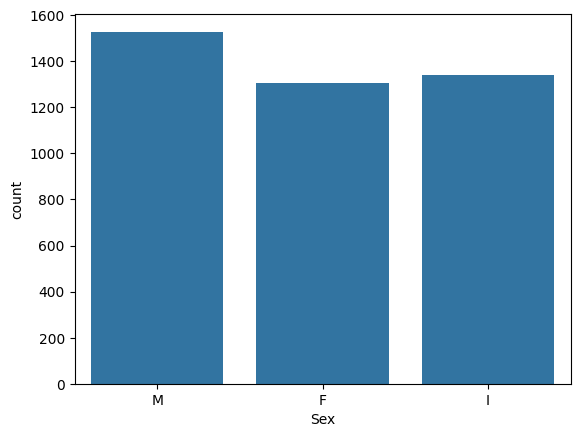

In [ ]:
sns.countplot(x = 'Sex', data = df)
df['Sex'].value_counts()


2. Length (Panjang Cangkang)
> Variabel ini berisikan pengukuran panjang cangkang kerang, dengan satuan ukur milimeter (mm). Dari describe diatas bahwa ukuran terpendek berupa 0.075 mm dan ukuran terpanjang 0.815 mm

3. Diameter
> Variabel ini berisikan pengukuran dari diameter pada abalone dengan pengukuran tegak lurus dengan panjang/lenght abalone. Satuan ukur berupa (mm) dengan ukuran diameter paling kecil 0.055 mm dan paling besar 0.65 mm.

4. Height (Tinggi)
> Variabel ini berisikan pengukuran dari Tinggi cangkang termasuk daging di dalam pada abalone. Satuan ukur berupa (mm) dengan ukuran abalone paling tinggi sebesar 1.13 mm.

5. Whole Wight (Berat Keseluruhan Abalone)
> Variabel ini berisikan pengukuran dari berat keseluruhan pada abalone termasuk berat cangkang dan daging dalam abalone. Satuan ukur berupa (gram) dengan ukuran paling berat 2.8255 g dan paling ringan 0.002 g.

6. Shucked Weight (Berat Daging)
>Variabel ini berisikan pengukuran dari berat daging pada abalone yang telah dikeluarkan dari cangkangnya. Satuan ukur berupa (gram) dengan yang paling berat sebesar 1.488 g dan paling ringan 0.001 g.

7. Viscera Weight (Berat Usus)
> Variabel ini berisikan pengukuran dari berat usus pada abalone yang telah dipisahkan dari cangkang dan dikeluarkan darah pada abalone. Satuan ukur berupa (gram) dengan ukuran berat usus paling kecil 0.0005 g dan paling besar 0.76 g.

8. Shell Weight (Berat Cabgkang)
>Variabel ini berisikan pengukuran dari berat pada cangkang abalone yang telah dikeringkan terlebih dahulu. Satuan ukur berupa (gram) dengan ukuran diameter paling kecil 0.055 mm dan paling besar 0.65 mm.

9. Rings
> Variabel ini berisikan pengukuran dari jumlah cincin pada abalone. Dimana penentuan umur pada abalone itu dilakukan dengan menjumlahkan jumlah rings pada balone dengan +1.5. Dengan jumlah rings paling sedikit adalah 1, maka perkiraan usian abalon tersebut : 1 + 1.5 = 2.5 tahun, dan jumlah rings paling banyak yaitu 29, maka usian abolen tersebut 29 + 1.5 = 30.5 tahun.




## **Box Plot**
Untuk melihat adakah outlier bisa menggunakan bantuan BoX Plot

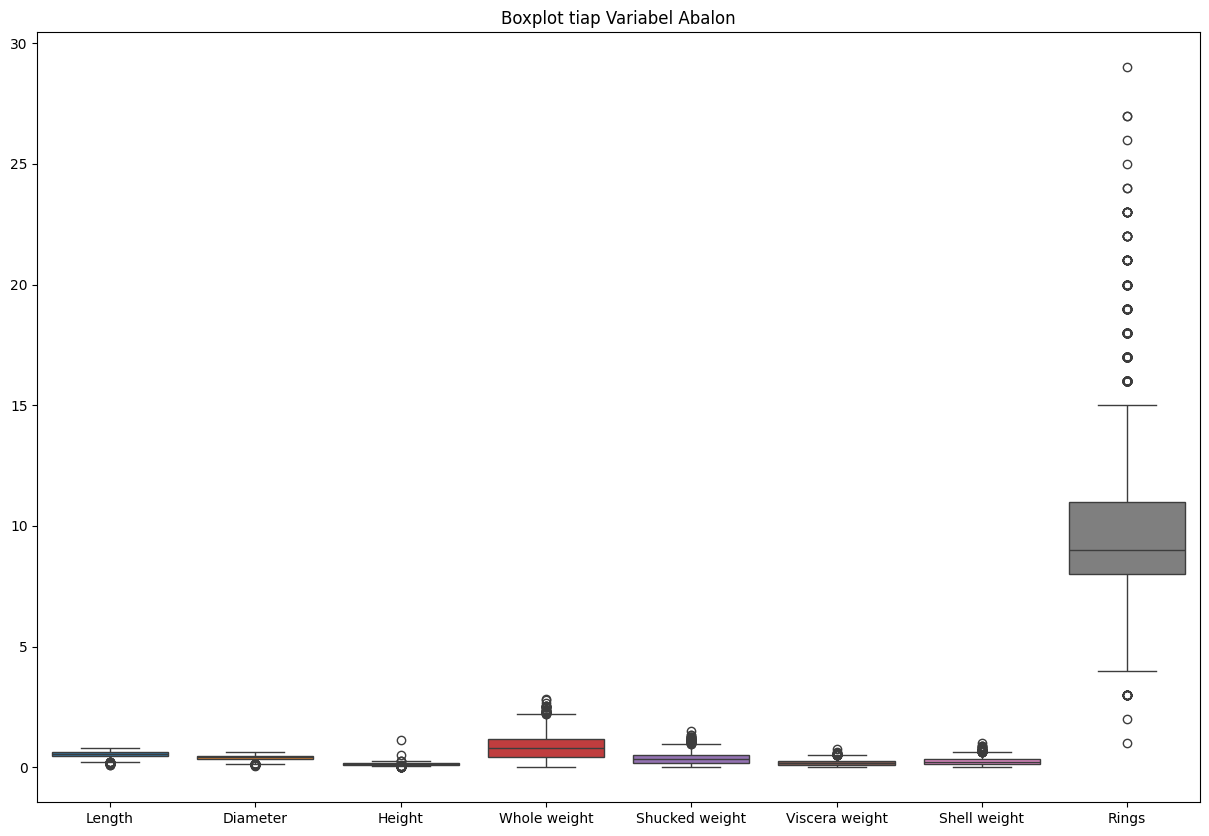

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))
sns.boxplot(data=df)
plt.title('Boxplot tiap Variabel Abalon')
plt.show()

Dapat dilihat pada boxplot diatas :
>Pada variabel Lenght terdapat beberapa outlier yang mendekati nilai 0, dimana rata-rata isi dari variabel lenght hanya 0.52 saja jadi pesebaran data diantara nilai terkecilnya 0.075 s.d nilai terbesarnya 0.815

>Pada variabel Diameter juga terdapat beberapa outlier dengan nilai mendekati 0, karena pesebaran nilai variabelnya diantara nilai terkecilnya 0.055 s.d nilai terbesarnya 0.65

>Pada Variabel Height terdapat outlier diatas nilai 1.4 dan mendekati 0, dimana pesebaran data pada variabel ini jika dilihat dari median nya berada pada nilai 1.4

>Pada variabel WHole Weight, Shucked Weight, Viscera Weightm dan Shell Weight juga memiliki nilai outlier diatas kotak/whicker

>Pada Variabel Rings tjuga terdapat outlier yang cukup berjauhan diatas 15 dan dibawah 4


## **Persebaran Tiap Variabel**

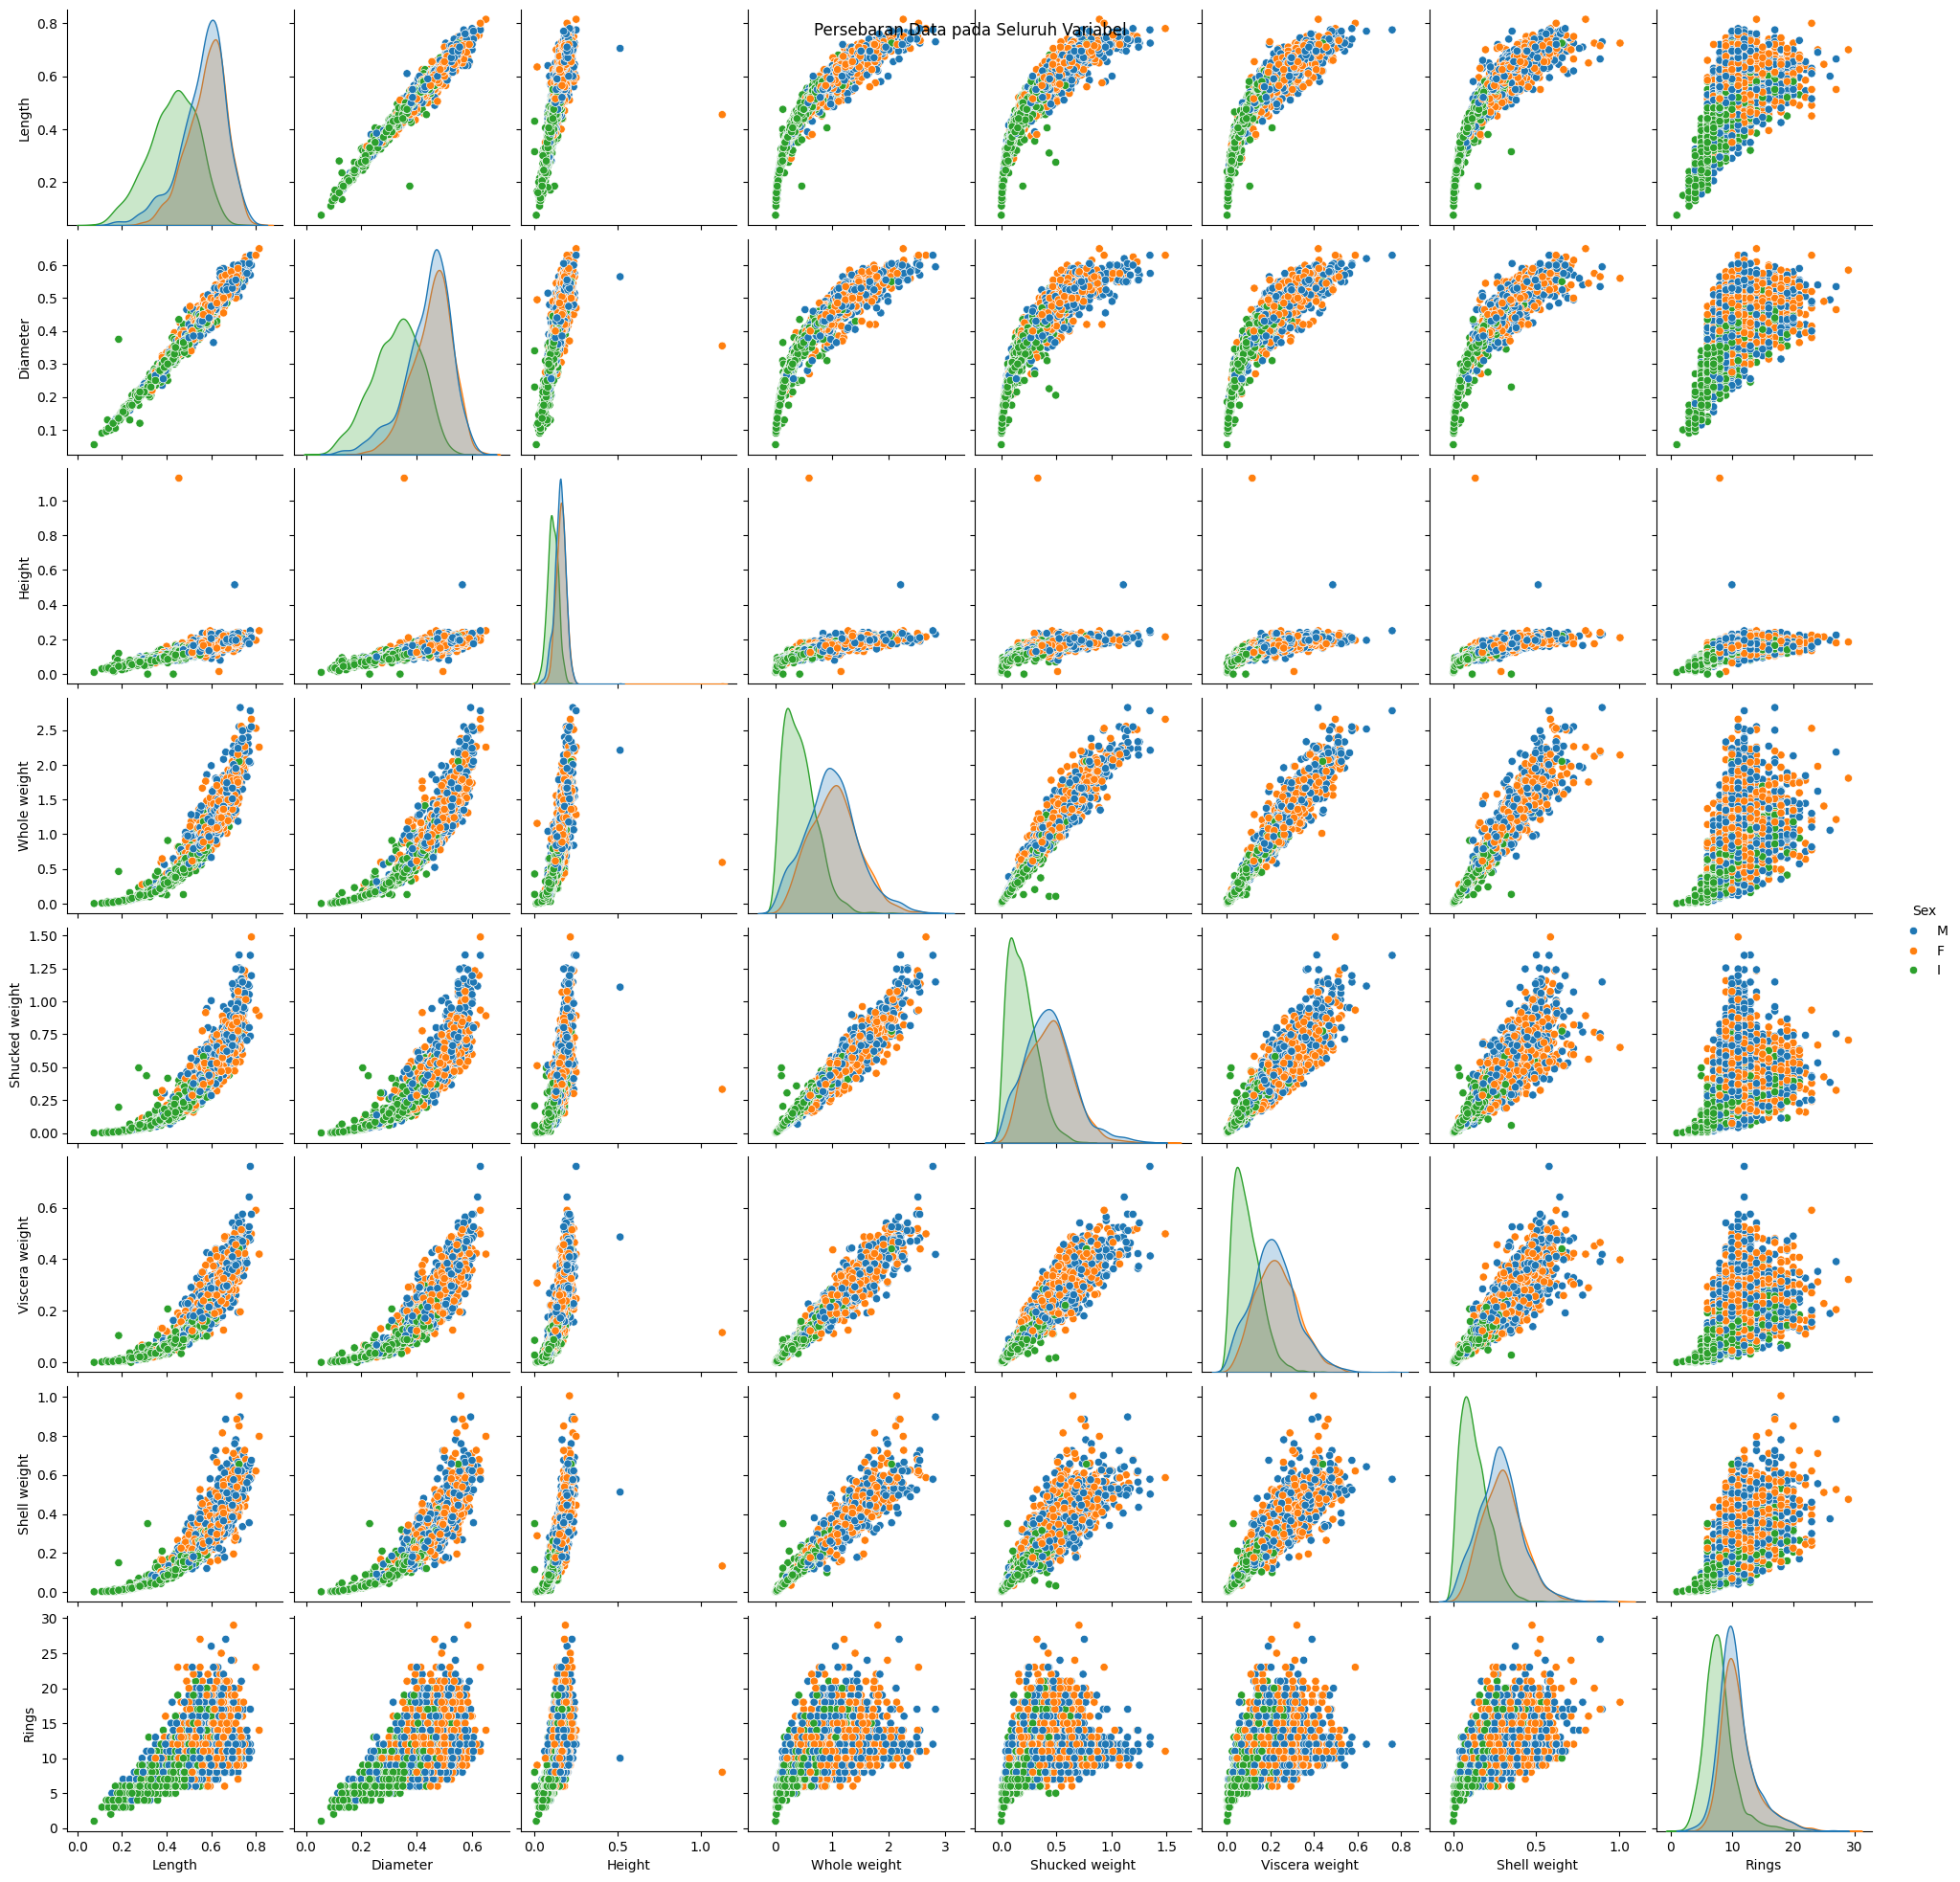

In [ ]:
sns.pairplot(df, hue = 'Sex')
plt.suptitle('Persebaran Data pada Seluruh Variabel')
plt.show()

>Diatas merupakan persebaran pada masing-masing variabel. Dengan warna biru untuk Male, warna orange untuk Female, dan warna hijau untuk Infant. Pada variabel Lenght/panjang, semakin panjang ukuran cangkang maka akan berbanding lurus dengan ke 8 variabel lainnya. Begitu pula pada tiap variabel lainnya saling berbanding lurus, yang artinya jika pajang abalone semakin besar maka variabel seperti diameter, berat akan semakin besar pula. Dapat dilihat juga, bahwa abalone dengan Sex Infant/Bayi memiliki ukuran fisiknya domininan lebih kecil ditiap variabel pengukuran fisik abalone.


## **Korelasi pada tiap variabel**





<ipython-input-10-1dfa770133dc>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


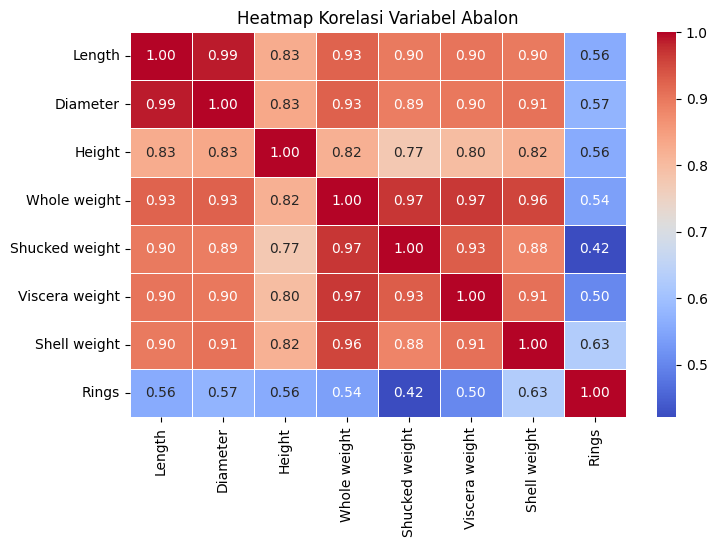

In [ ]:
# Menghitung korelasi antar variabel dalam datasets abalon
correlation_matrix = df.corr()

#heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Heatmap Korelasi Variabel Abalon')
plt.show()

Pada korelasi di heatmap, jika mendekati -1 berarti korelasi negatif, mendekati +1 korelasi postif, dan jika 0 maka tidak ada korelasi. Dari heatmap diatas variabel yg memiliki niali korelasi yang paling tinggi itu adalah variabel length/panjang dengan variabel diameter dengan nilai korelasi 0.99. Yang artinya kedua variabel ini memiliki korelasi positif, dimana jika panjang cangkang kerang semakin panjang maka diameternya pun akan semakin besar pula.
Juga nilai korelasi yang terendah itu pada hubungan antara variabel shucked weight dan Rings.

**Hubungan Korelasi tiap Variabel**

>setelah melihat nilai korelasi dari heatmap diatas, didapatkan bahwa :


1.   Variabel Lenght dan Diameter, memiliki korelasi yang tinggi artinya saling berkorelasi. Jika semaking panjang cangkang abalone maka akan semakin besar pula diameter pada abalone, yang ditampilkan pada scatterplot ini :


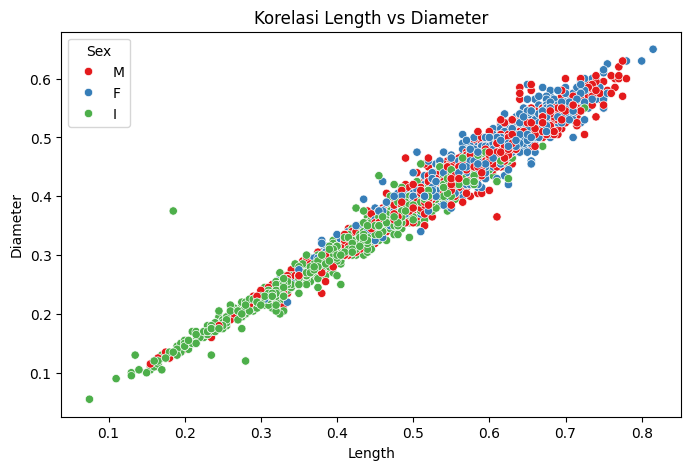

In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Length', y='Diameter', hue='Sex', data=df, palette='Set1')
plt.title('Korelasi Length vs Diameter')
plt.show()

>Dapat dilihat bahwa, semakin besar nilai Lenght makan semakin besar pula nilai variabel Diameter. Dari scatterplot ini, dapat dilihat bahwa Infant/Bayi mendominasi nilai yang kecil dari kedua variabel ini. Karena Infant masih dalam tahap pertumbuhan.


2. Variabel Ring dan Shucked Wight, memiliki korelasi yang rendah diantara variabel lainnya, yang ditampilkan pada scatterplot ini :

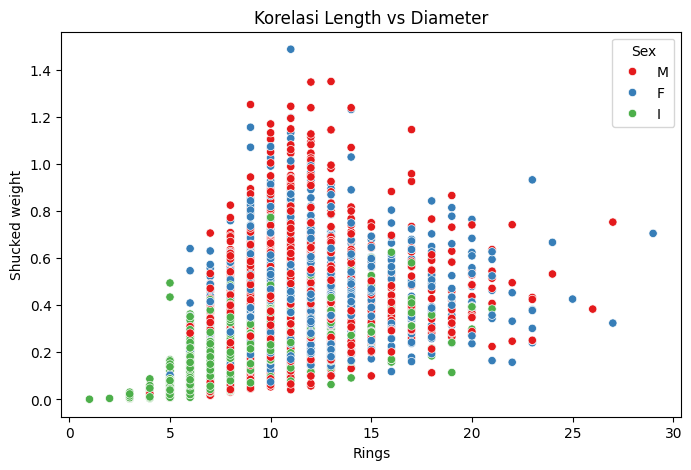

In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Rings', y='Shucked weight', hue='Sex', data=df, palette='Set1')
plt.title('Korelasi Length vs Diameter')
plt.show()

>Pada scatterplot ini, sedikit sulit untuk melihat korelasi antara variabel Shucked weight dan Rings ini. Tapi masih dapat dilihat bahwa Infant/bayi masih mendominasi nilai terkecil karena masih dalam tahap pertumbuhan.

3. Variabel Whole Weight dengan Viscera Weight dan Shucked Wight yang memiliki nilai korelasi yang sama sebesar 0.97, yang ditampilkan pada scatterplot ini :

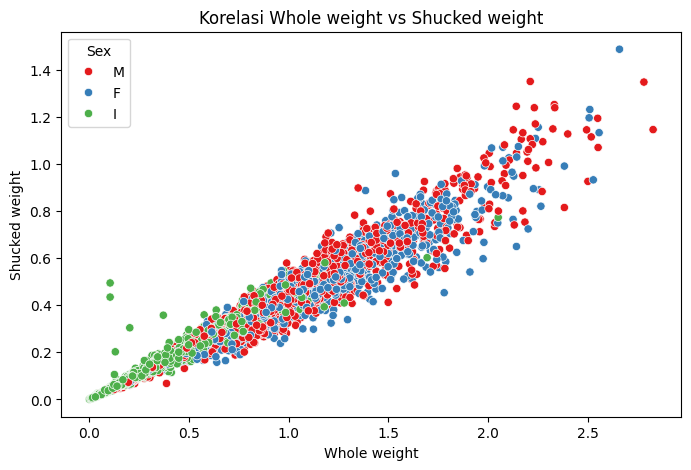

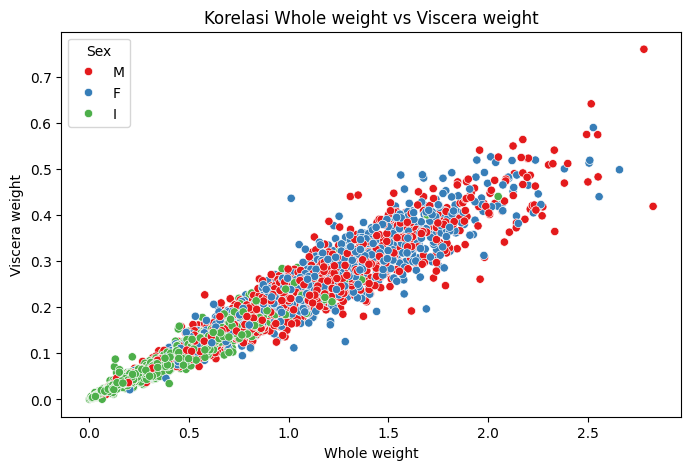

In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Whole weight', y='Shucked weight', hue='Sex', data=df, palette='Set1')
plt.title('Korelasi Whole weight vs Shucked weight')
plt.show()
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Whole weight', y='Viscera weight', hue='Sex', data=df, palette='Set1')
plt.title('Korelasi Whole weight vs Viscera weight')
plt.show()

>Dapat dilihat pada kedua sctterplot yang menampilkan variabel Whole Weight dengan Viscera Weight dan Shucked Wight, karena miliki korelasi yang tinggi sebesar 0.97 ketiga variabel ini saling berkorelasi positif. Karena jika berat keseluruhan abalone Whole weight besar, maka kedua variabel Shucked Weight/ berat daging dan Viscera Weight/berat usus juga akan menjadi berat juga. Berlaku kebalikannya juga, jadi jika berat daging dan usus nya besar maka berat keselurahan juga akan maki berat.

>

# **IDENTIFIKASI MASALAH DATASET**

## **Pembersihan Outlier Tiap Variabel**


Melihat apa ada missing value pada semua atribute :

In [ ]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

Dapat dilihat bahwa pada dataset yang digunakan tidak ada missing values atau nilai null.

**1. Sex**

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 66.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 62.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 68.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 72.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 69.2% of the points cannot be plac

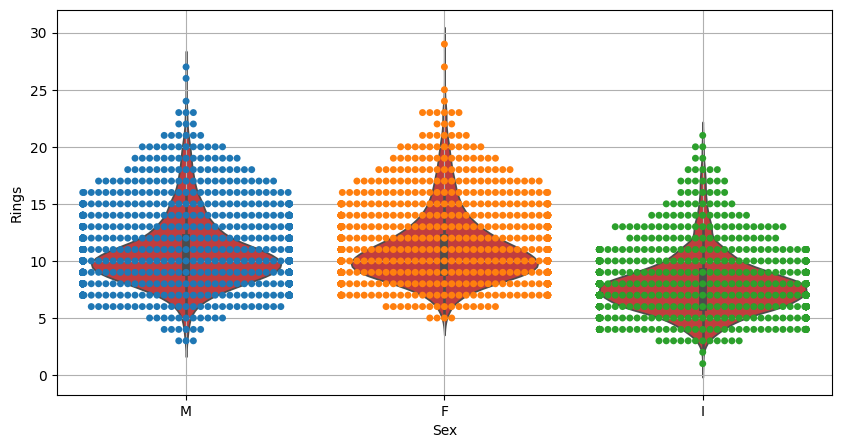

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.swarmplot(x='Sex', y='Rings', data=df, hue='Sex', ax=ax)
sns.violinplot(x='Sex', y='Rings', data=df, ax=ax)
ax.grid(True)

plt.show()

dapat dilihat bahwa pada Males memiliki rentang usia 7.5 s.d 19 tahun, Female 8 s.d 19 tahun, dan Infant dari 5 s.d 10 tahun

In [ ]:
df = pd.get_dummies(df)
df.head()

Length  Diameter  Height  Whole weight  Shucked weight  Viscera weight  \
0   0.455     0.365   0.095        0.5140          0.2245          0.1010   
1   0.350     0.265   0.090        0.2255          0.0995          0.0485   
2   0.530     0.420   0.135        0.6770          0.2565          0.1415   
3   0.440     0.365   0.125        0.5160          0.2155          0.1140   
4   0.330     0.255   0.080        0.2050          0.0895          0.0395   

   Shell weight  Rings  Sex_F  Sex_I  Sex_M  
0         0.150     15  False  False   True  
1         0.070      7  False  False   True  
2         0.210      9   True  False  False  
3         0.155     10  False  False   True  
4         0.055      7  False   True  False

Dilakukan encoding dengan get_gummies pada data categorical Sex, agar dapat diolah selanjutnya untuk pembuatan model. Dengan get_dummies dapat memisahkan label apa saja yang ada pada variabel Sex menjadi Sex_F (untuk Female), Sex_I (Infant) dan Sex_M (Male)

**2. Length**

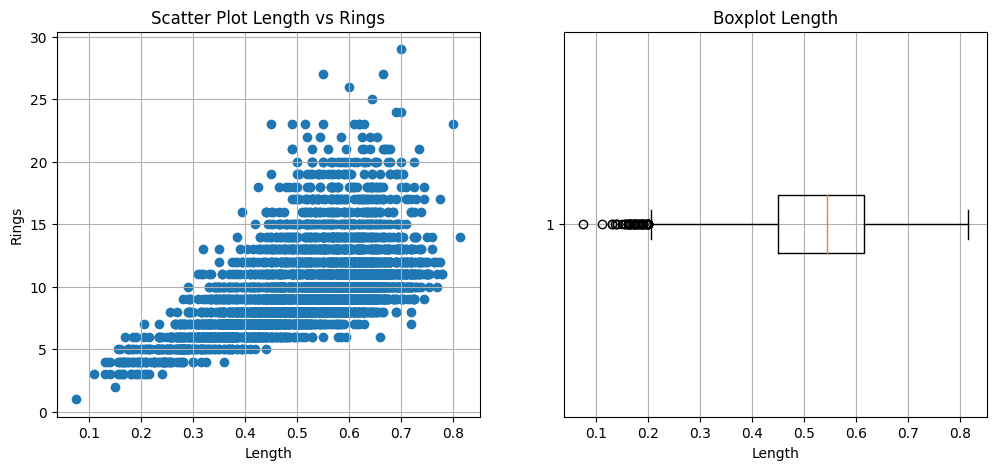

In [ ]:
#Membuat plot dari fitur Length untuk melihat apakah ada data outlier :
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.scatter(x=df['Length'], y=df['Rings'])
ax1.set_title('Scatter Plot Length vs Rings')
ax1.set_xlabel('Length')
ax1.set_ylabel('Rings')
ax1.grid(True)

ax2.boxplot(df['Length'], vert=False)
ax2.set_title('Boxplot Length')
ax2.set_xlabel('Length')
ax2.grid(True)

plt.show()

Dari scatter plot diatas terlihat pesebaran data Length terhadap Rings yang menjadi data target, dan pada boxplot terlihat ada outlier di bawah 0.2 yang akan dilakukan penghapusan seperti dibawah berikut ini :

In [ ]:
df.drop(df[(df['Length'] <0.1) &(df['Rings'] < 5)].index, inplace = True)
df.drop(df[(df['Length']<0.8) & (df['Rings'] > 25)].index, inplace = True)
df.drop(df[(df['Length']>=0.8) & (df['Rings'] < 25)].index, inplace = True)

Pada code diatas dilakukan penghapusan pada data :
1. nilai length yang kurang dari 0.1 dan Rings kurang dari 5
2. nilai length yang kurang dari 0.8 dan Rings lebih dari 25
3. nilai length yang lebih dari 0.8 dan Rings kurang dari 25

Sehingga jika dilihat hasil shape pada df memuliki baris sebanyak 4170, yang awalnya 4177.

In [ ]:
df.shape

(4170, 11)

**3. Diameter**

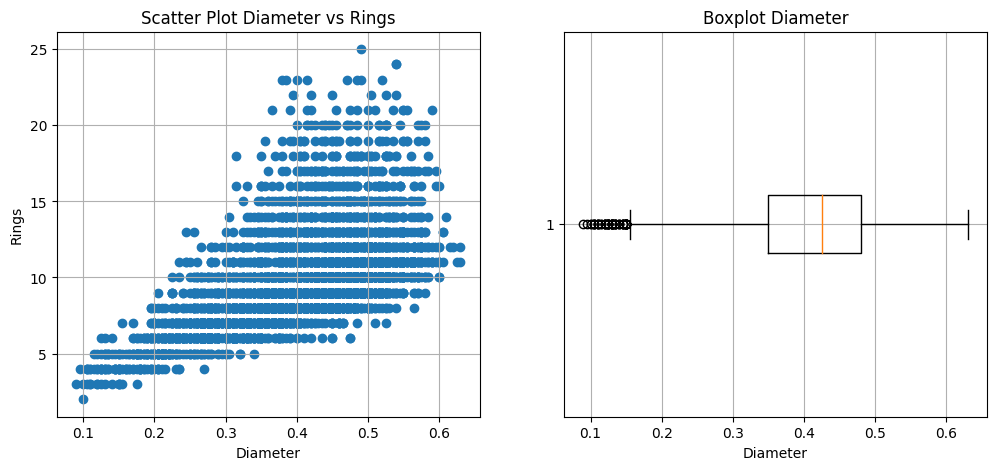

In [ ]:
#Membuat plot dari fitur Diameter untuk melihat apakah ada data outlier :
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.scatter(x=df['Diameter'], y=df['Rings'])
ax1.set_title('Scatter Plot Diameter vs Rings')
ax1.set_xlabel('Diameter')
ax1.set_ylabel('Rings')
ax1.grid(True)

ax2.boxplot(df['Diameter'], vert=False)
ax2.set_title('Boxplot Diameter')
ax2.set_xlabel('Diameter')
ax2.grid(True)

plt.show()

In [ ]:
df.drop(df[(df['Diameter'] <0.15) &(df['Rings'] < 5)].index, inplace = True)
df.drop(df[(df['Diameter']<0.6) & (df['Rings'] > 25)].index, inplace = True)
df.drop(df[(df['Diameter']>=0.6) & (df['Rings'] < 25)].index, inplace = True)

Pada code diatas dilakukan penghapusan pada data :
1. nilai Diameter yang kurang dari 0.15 dan Rings kurang dari 5
2. nilai Diameter yang kurang dari 0.6 dan Rings lebih dari 25
3. nilai Diameter yang lebih dari 0.6 dan Rings kurang dari 25

Sehingga jika dilihat hasil shape pada df memuliki baris sebanyak 4120 data

In [ ]:
df.shape

(4120, 11)

**4. Height**

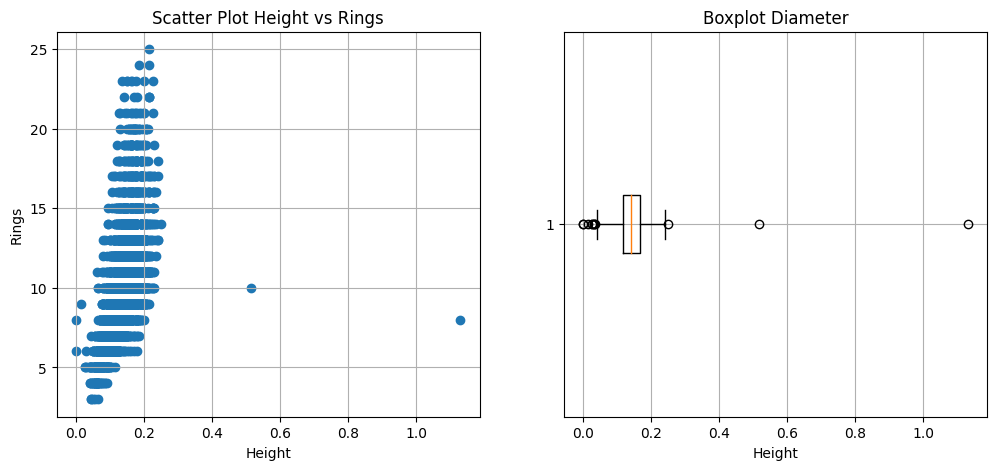

In [ ]:
#Membuat plot dari fitur Height untuk melihat apakah ada data outlier :
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.scatter(x=df['Height'], y=df['Rings'])
ax1.set_title('Scatter Plot Height vs Rings')
ax1.set_xlabel('Height')
ax1.set_ylabel('Rings')
ax1.grid(True)

ax2.boxplot(df['Height'], vert=False)
ax2.set_title('Boxplot Diameter')
ax2.set_xlabel('Height')
ax2.grid(True)

plt.show()

In [ ]:
df.drop(df[(df['Height']<0.4) & (df['Rings'] > 25)].index, inplace = True)
df.drop(df[(df['Height'] > 0.4) &(df['Rings'] < 15)].index, inplace = True)

Pada code diatas dilakukan penghapusan pada data :

1. nilai Height yang lebih dari 0.4 dan Rings kurang dari 15
2. nilai Height yang kurang dari 0.4 dan Rings lebih dari 25

Sehingga jika dilihat hasil shape pada df memiliki baris sebanyak 4118 data


In [ ]:
df.shape

(4118, 11)

**5. Whole Weight**

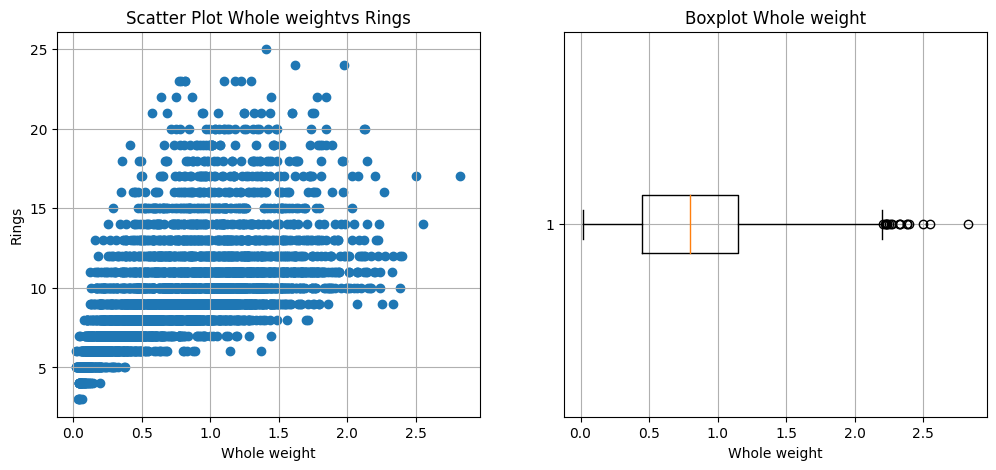

In [ ]:
#Membuat plot dari fitur Whole weight untuk melihat apakah ada data outlier :
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.scatter(x=df['Whole weight'], y=df['Rings'])
ax1.set_title('Scatter Plot Whole weightvs Rings')
ax1.set_xlabel('Whole weight')
ax1.set_ylabel('Rings')
ax1.grid(True)

ax2.boxplot(df['Whole weight'], vert=False)
ax2.set_title('Boxplot Whole weight')
ax2.set_xlabel('Whole weight')
ax2.grid(True)

plt.show()

In [ ]:
df.drop(df[(df['Whole weight']<2.5) & (df['Rings'] > 25)].index, inplace = True)
df.drop(df[(df['Whole weight'] >= 2.5) &(df['Rings'] < 25)].index, inplace = True)

Pada code diatas dilakukan penghapusan pada data :

1. nilai Whole weight yang kurang dari 2.5 dan Rings lebih dari 15
2. nilai Whole weight yang lebih dari 2.5 dan Rings kurang dari 25

Sehingga jika dilihat hasil shape pada df memiliki baris sebanyak 4116 data


In [ ]:
df.shape

(4116, 11)

**6. Shucked Weight**

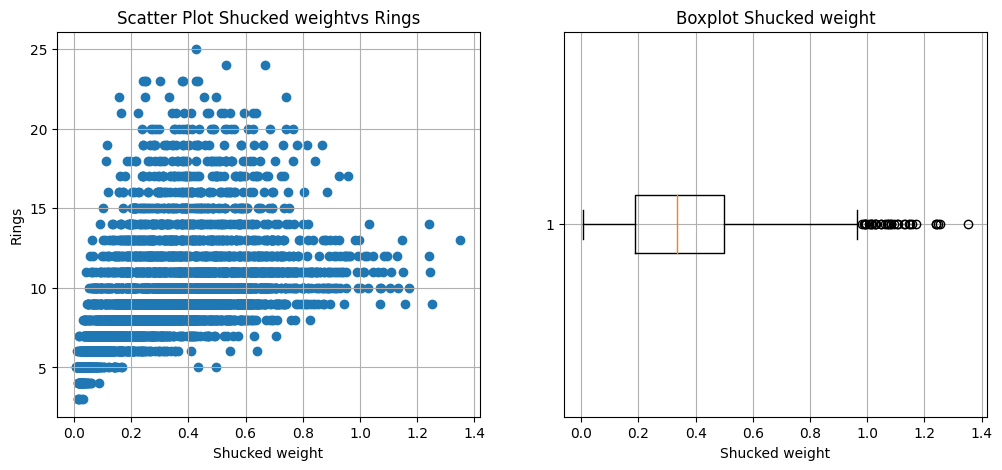

In [ ]:
 #Membuat plot dari fitur Shucked weight untuk melihat apakah ada data outlier :
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.scatter(x=df['Shucked weight'], y=df['Rings'])
ax1.set_title('Scatter Plot Shucked weightvs Rings')
ax1.set_xlabel('Shucked weight')
ax1.set_ylabel('Rings')
ax1.grid(True)

ax2.boxplot(df['Shucked weight'], vert=False)
ax2.set_title('Boxplot Shucked weight')
ax2.set_xlabel('Shucked weight')
ax2.grid(True)

plt.show()

In [ ]:
df.drop(df[(df['Shucked weight'] >= 1) &(df['Rings'] < 20)].index, inplace = True)
df.drop(df[(df['Shucked weight']<1) & (df['Rings'] > 20)].index, inplace = True)

Pada code diatas dilakukan penghapusan pada data :

1. nilai Shucked weight yang lebih dari 1 dan Rings kurang dari 20
2. nilai Shucked weight yang kurang dari 1 dan Rings lebih dari 20

Sehingga jika dilihat hasil shape pada df memiliki baris sebanyak 4116 data


In [ ]:
df.shape

(4056, 11)

**7. Viscera Weight**

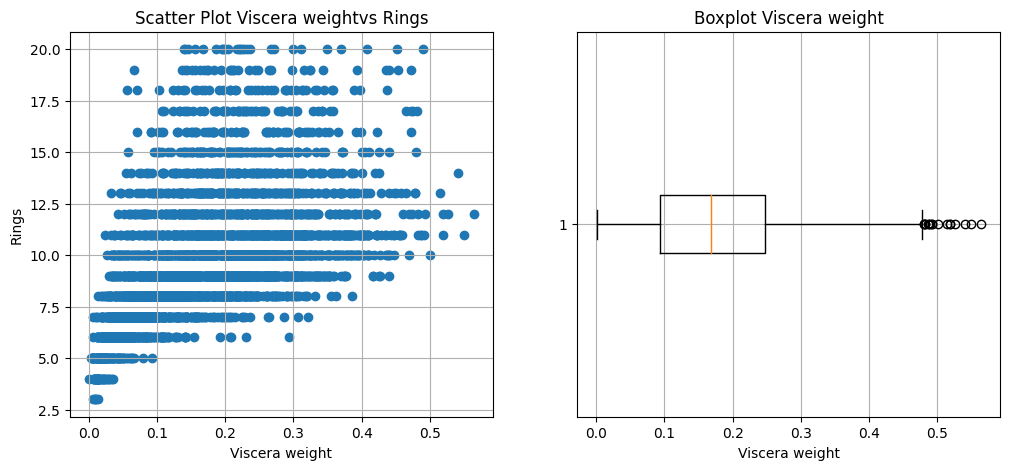

In [ ]:
 #Membuat plot dari fitur Viscera weight untuk melihat apakah ada data outlier :
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.scatter(x=df['Viscera weight'], y=df['Rings'])
ax1.set_title('Scatter Plot Viscera weightvs Rings')
ax1.set_xlabel('Viscera weight')
ax1.set_ylabel('Rings')
ax1.grid(True)

ax2.boxplot(df['Viscera weight'], vert=False)
ax2.set_title('Boxplot Viscera weight')
ax2.set_xlabel('Viscera weight')
ax2.grid(True)

plt.show()

In [ ]:
df.drop(df[(df['Viscera weight'] > 0.5) &(df['Rings'] < 20)].index, inplace = True)
df.drop(df[(df['Viscera weight']<0.5) & (df['Rings'] > 25)].index, inplace = True)

Pada code diatas dilakukan penghapusan pada data :

1. nilai Viscera weight yang lebih dari 0.5 dan Rings kurang dari 20
2. nilai Viscera weight yang kurang dari 0.5 dan Rings lebih dari 25

Sehingga jika dilihat hasil shape pada df memiliki baris sebanyak 4048 data


In [ ]:
df.shape

(4048, 11)

**8. Shell Weight**

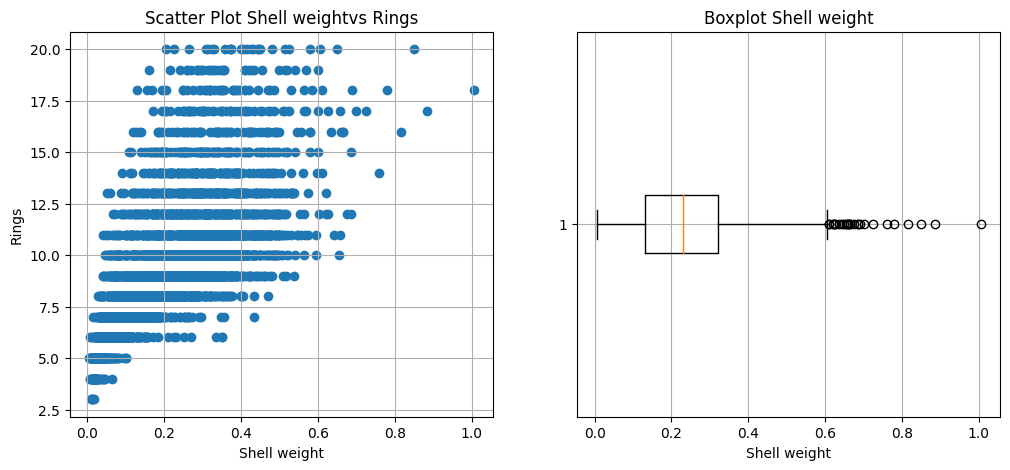

In [ ]:
 #Membuat plot dari fitur Shell weight untuk melihat apakah ada data outlier :
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.scatter(x=df['Shell weight'], y=df['Rings'])
ax1.set_title('Scatter Plot Shell weightvs Rings')
ax1.set_xlabel('Shell weight')
ax1.set_ylabel('Rings')
ax1.grid(True)

ax2.boxplot(df['Shell weight'], vert=False)
ax2.set_title('Boxplot Shell weight')
ax2.set_xlabel('Shell weight')
ax2.grid(True)

plt.show()

In [ ]:
df.drop(df[(df['Shell weight'] > 0.6) &(df['Rings'] < 25)].index, inplace = True)
df.drop(df[(df['Shell weight']<0.8) & (df['Rings'] > 25)].index, inplace = True)

Pada code diatas dilakukan penghapusan pada data :

1. nilai Shell weight yang lebih dari 0.6 dan Rings kurang dari 25
2. nilai Shell weight yang kurang dari 0.8 dan Rings lebih dari 25

Sehingga jika dilihat hasil shape pada df memiliki baris sebanyak 4018 data


In [ ]:
df.shape

(4018, 11)

Berikut hasil data yang telah dilakukan preprocessing pada tiap fitur-nya:

In [ ]:
df

Length  Diameter  Height  Whole weight  Shucked weight  Viscera weight  \
0      0.455     0.365   0.095        0.5140          0.2245          0.1010   
1      0.350     0.265   0.090        0.2255          0.0995          0.0485   
2      0.530     0.420   0.135        0.6770          0.2565          0.1415   
3      0.440     0.365   0.125        0.5160          0.2155          0.1140   
4      0.330     0.255   0.080        0.2050          0.0895          0.0395   
...      ...       ...     ...           ...             ...             ...   
4172   0.565     0.450   0.165        0.8870          0.3700          0.2390   
4173   0.590     0.440   0.135        0.9660          0.4390          0.2145   
4174   0.600     0.475   0.205        1.1760          0.5255          0.2875   
4175   0.625     0.485   0.150        1.0945          0.5310          0.2610   
4176   0.710     0.555   0.195        1.9485          0.9455          0.3765   

      Shell weight  Rings  Sex_F  Sex_I  Sex_M  
0           0.1500     15  False  False   True  
1           0.0700      7  False  False   True  
2           0.2100      9   True  False  False  
3           0.1550     10  False  False   True  
4           0.0550      7  False   True  False  
...            ...    ...    ...    ...    ...  
4172        0.2490     11   True  False  False  
4173        0.2605     10  False  False   True  
4174        0.3080      9  False  False   True  
4175        0.2960     10   True  False  False  
4176        0.4950     12  False  False   True  

[4018 rows x 11 columns]

kemudian data yang telah dipreprocesing tadi dimasukkan ke dalam varibael data.

In [ ]:
data = df.copy()
data

Length  Diameter  Height  Whole weight  Shucked weight  Viscera weight  \
0      0.455     0.365   0.095        0.5140          0.2245          0.1010   
1      0.350     0.265   0.090        0.2255          0.0995          0.0485   
2      0.530     0.420   0.135        0.6770          0.2565          0.1415   
3      0.440     0.365   0.125        0.5160          0.2155          0.1140   
4      0.330     0.255   0.080        0.2050          0.0895          0.0395   
...      ...       ...     ...           ...             ...             ...   
4172   0.565     0.450   0.165        0.8870          0.3700          0.2390   
4173   0.590     0.440   0.135        0.9660          0.4390          0.2145   
4174   0.600     0.475   0.205        1.1760          0.5255          0.2875   
4175   0.625     0.485   0.150        1.0945          0.5310          0.2610   
4176   0.710     0.555   0.195        1.9485          0.9455          0.3765   

      Shell weight  Rings  Sex_F  Sex_I  Sex_M  
0           0.1500     15  False  False   True  
1           0.0700      7  False  False   True  
2           0.2100      9   True  False  False  
3           0.1550     10  False  False   True  
4           0.0550      7  False   True  False  
...            ...    ...    ...    ...    ...  
4172        0.2490     11   True  False  False  
4173        0.2605     10  False  False   True  
4174        0.3080      9  False  False   True  
4175        0.2960     10   True  False  False  
4176        0.4950     12  False  False   True  

[4018 rows x 11 columns]

# **PEMILIHAN MODEL**


Menggunakan Supervised Learning dengan metode klasifikasi Random Forest untuk melakukan pengkalasifikasian pada umur abalone, menggunkanan dataset abalone yang telah dilakukan preprocessing terlebih dahulu

## **Flowchart Kerja**

berikut flowchart kerja yang dilakukan dipresentasikan pada gambar di bawah:

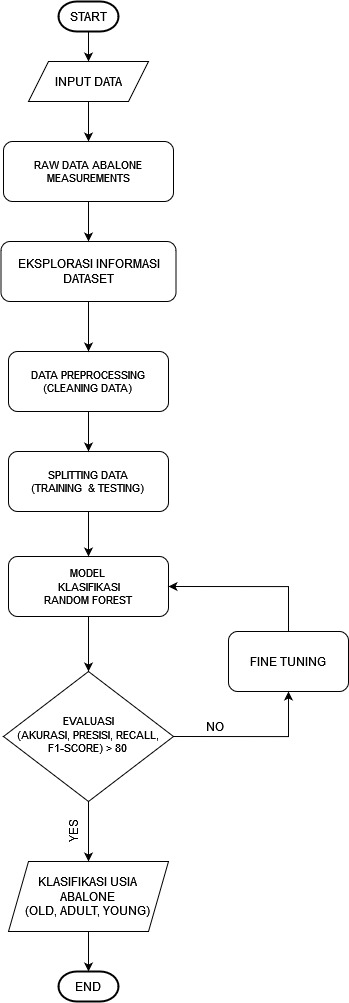

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
img = cv2.imread('/content/drive/MyDrive/ML/MLL.jpg', cv2.IMREAD_UNCHANGED)
cv2_imshow(img)

Pertama, Data dilakukan analisis/ekplorasi terlebih dahulu untuk melihat korelasi dan informasi pada data. Yang kemudian akan dilakukan data preprocessing dari data raw menjadi data yang siap dilakukan training dan testing. Kemudia, data dibagi menjadi data training dan testing yang akan dimasukkan ke dalam model pengklasifikasian Random Forest. Hasil dari pengklasifikasian akan dievaluasi menggunakan performence matrics.

## **Arsitektur Model Random Forest Algoritma Klasifikasi**

Berikut arsitektur dari algoritma klasifikasi menggunakan Random Forest:

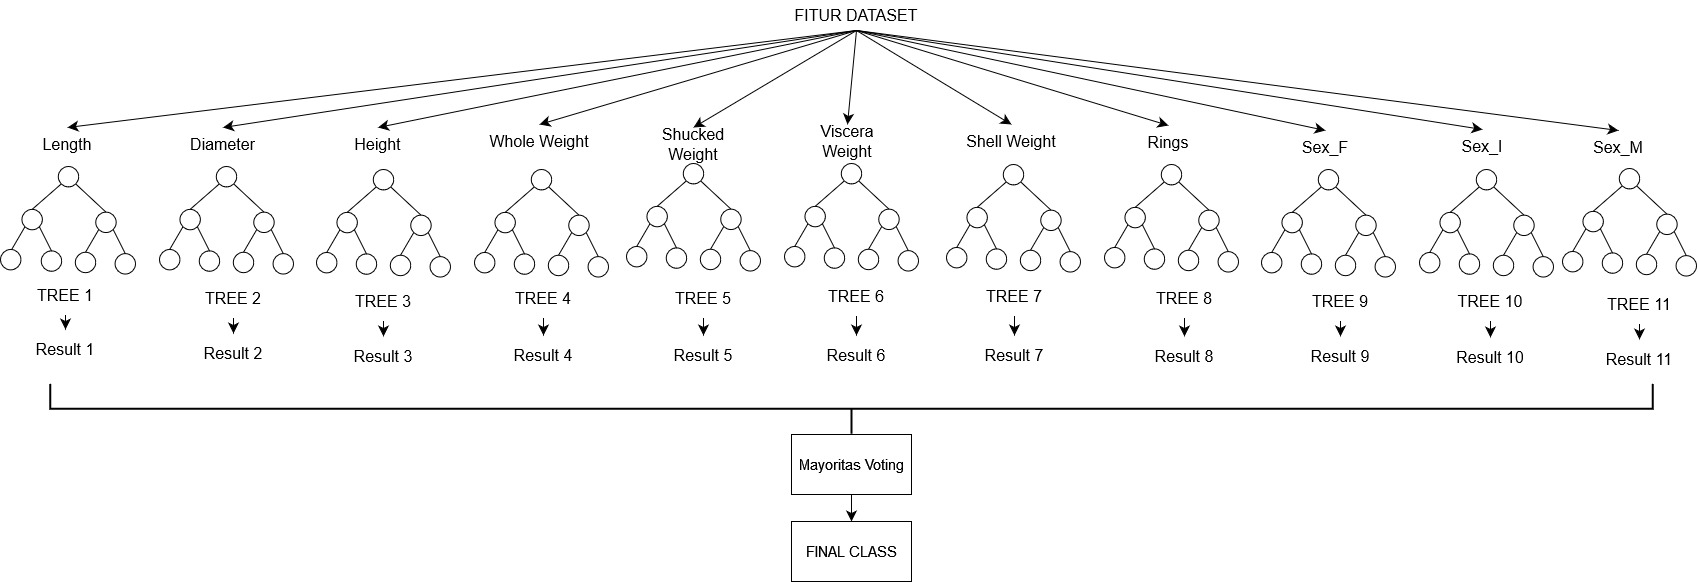

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
img_Arc = cv2.imread('/content/drive/MyDrive/ML/RF.jpg', cv2.IMREAD_UNCHANGED)
cv2_imshow(img_Arc)

dapat dilihat data fitur yang digunakan ada 11 yaitu  Sex (Sex_F, Sex_I,Sex_M), Length, Diameter, Height, Whole_weight, Shucked_weight, Viscera_weight, dan Shell_weight. Dari data fitur ini lah akan dilakukan klasifikasi terhadap umur abalone dengan variabel targetnya Rings.

#**TRAINING MODEL KLASIFIKASI RANDOM FOREST**

## **Splitting Data dan Standarization**


setelah dilakukan data preprocessing, maka dilakukan pemisahan data X dan data y yang menjadi target, yang kemudian akan dilakukan standarisasi data agar rentang data pada tiap variabel tidak ada yang mendominasi, dan dilakukan splitting data menjadi data train dan data testing :

In [ ]:
#import library untuk melakukan spliting dan standarization data:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_selection import SelectKBest

Membagi data menjadi variabel X yang berisi data features, dan y yang berisi data target :

In [ ]:
#membagi dataset menjadi varibel X yang merupakan varabel fitur, dan y yang menjadi variabel target
X = data.drop('Rings', axis = 1)
y = pd.cut(data['Rings'], bins=[0, 6, 13, 30], labels=['Young', 'Adult', 'Old'])

dari codingan di atas :
- variabel X berisi fitur  : Sex (Sex_F, Sex_I,Sex_M), Length, Diameter, Height, Whole_weight, Shucked_weight, Viscera_weight, dan Shell_weight.
- variabel y berisi target : Yaitu Rings, dimana diabagi menjadi 3 bagian ( 0-6 untuk Young, 7-13 untuk Adult, dan 14-29 untuk Old)


melakukan standarisasi data agar nilai pada tiap variabel tidak ada yang mendominasi :

In [ ]:
standardScale = StandardScaler()
standardScale.fit_transform(X)

array([[-0.58943755, -0.43746459, -1.18790132, ..., -0.67239438,
        -0.69591664,  1.32650495],
       [-1.51363268, -1.50104896, -1.32537216, ..., -0.67239438,
        -0.69591664,  1.32650495],
       [ 0.07070184,  0.14750682, -0.08813461, ...,  1.48722242,
        -0.69591664, -0.75386074],
       ...,
       [ 0.68683193,  0.73247822,  1.83645712, ..., -0.67239438,
        -0.69591664,  1.32650495],
       [ 0.90687839,  0.83883666,  0.3242779 , ...,  1.48722242,
        -0.69591664, -0.75386074],
       [ 1.65503635,  1.58334572,  1.56151545, ..., -0.67239438,
        -0.69591664,  1.32650495]])

Melakukan standarisasi data agar rentang nilai pada variabel tidak ada yang mendominasi sehingga dapat menghasilkan performas model yang baik. Disini menggunakan StandarScaler dengan melakukan fit_transform pada variabel X.


Dengan SelectKBest untuk membantu memilih fitur yang terbaik dari X dan y, yang kemudian akan ditranform ke dalam variabel KBest, dan dilakukan spliting data dengan perbandingan train dan testing sebesara 70% : 30%

In [ ]:
selectkBest = SelectKBest()
KBest = selectkBest.fit_transform(X, y)

X_train, X_test, y_train, y_test = train_test_split(KBest, y, test_size = 0.3, random_state=42)

SelectKBest digunakan untuk memilih fitur yang paling relevan dan terbaik untuk dimasukkan kedalam model. Disini dilakukan pemisahan data train dan data test dengan data train sebesar 70% dan data set sebesar 30% dari hasil pemilihan fitur oleh SelctKBest dan dari y.

In [ ]:
X_train

array([[0.64 , 0.515, 0.205, ..., 1.   , 0.   , 0.   ],
       [0.67 , 0.52 , 0.195, ..., 1.   , 0.   , 0.   ],
       [0.54 , 0.435, 0.14 , ..., 0.   , 0.   , 1.   ],
       ...,
       [0.385, 0.265, 0.08 , ..., 0.   , 1.   , 0.   ],
       [0.525, 0.425, 0.14 , ..., 1.   , 0.   , 0.   ],
       [0.4  , 0.31 , 0.11 , ..., 0.   , 0.   , 1.   ]])

In [ ]:
y_train

1506    Adult
3989    Adult
2584    Adult
1800    Adult
244     Adult
        ...  
1191    Adult
1363    Adult
916     Young
3652    Adult
3313    Adult
Name: Rings, Length: 2812, dtype: category
Categories (3, object): ['Young' < 'Adult' < 'Old']

Dapat dilihat pada X_train berisi nilai fitur berbentuk array, sedangkan y_train memuat variabel targetnya.

## **Training Model**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, classification_report

# Membuat model klasifikasi random forest:
rf1 = RandomForestClassifier(n_estimators=150, max_depth=10, random_state=100)

# training data pada model
rf1.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=150, random_state=100)

Pada pembangunan model klasifikasi Random Forest ini, menggunakan pohon keputusan atau n_estimator sebanyak 150, max_depth : 50, dengan random_state 100 untuk hasil trainingnya tetap.

pembuatan model ditunjukkan pada code : model = RandomForestClassifier(n_estimators=150, max_depth=50, random_state=100), dimana menggunakan klasifikasi Random Forest, dengan banyak pohon kepurusan yang digunakan sebesar 150, dan nilai random_state agar nilai training tidak berubah sebesar 100.

training model dilakukan pada code : model.fit(X_train, y_train), dimana model yang telah dibuat dilakukan fit pada X_train dan y_train.

In [ ]:
# Menampilkan evaluasi matricsnya
y_pred_train1 = rf1.predict(X_train)
y_pred1 = rf1.predict(X_test)

print("Random Forest Training Accuracy: ", accuracy_score(y_train, y_pred_train1))
print("Random Forest Test Accuracy: ", accuracy_score(y_test, y_pred1))
print("\nClassification Report:")
print(classification_report(y_test, y_pred1))

Random Forest Training Accuracy:  0.914651493598862
Random Forest Test Accuracy:  0.8266998341625207

Classification Report:
              precision    recall  f1-score   support

       Adult       0.83      0.98      0.90       924
         Old       0.85      0.15      0.26       143
       Young       0.80      0.53      0.64       139

    accuracy                           0.83      1206
   macro avg       0.82      0.55      0.60      1206
weighted avg       0.83      0.83      0.79      1206



Dapat dilihat perhitungan akurasi dari y_test dan y_pred (didapatkan dari melakukan prediksi dengan model yang telah dibuat pada X_test) menghasilkan nilai akurasi training mengunakan klasifikasi dengan model random forest dengan memakai n_estimators sebanyak 150 dengan random_state 100, sebesar 82.669

pada laporan klasifikasi diatas menjelaskan nilai presisi, recall, dan f1-score pada ketiga kelas diatas yaitu : Old, Adult, dan Young.

Dengan nilai matrik evaluasi pada tiap kelas sebesar:
- Adult : memiliki presisi sebesar 0.83, recall 0.98, dan f1-score sebesar 0.90
- Olds : memiliki presisi sebesar 0.85, recall 0.15, dan f1-score sebesar 0.26
- Young : memiliki presisi sebesar 0.80, recall 0.53, dan f1-score sebesar 0.64

#**Hyperparameter**



Disini saya menggunakan dua model yaitu :
1. Model Klasifikasi Random Forest
2. Model Klasifikasi KNN

**1. MODEL RANDOM FOREST**

**- Model Random Forest 1**

In [ ]:
# Membuat model klasifikasi random forest 1 dengan parameter berikut:
rf1 = RandomForestClassifier(n_estimators=150, max_depth=10, random_state=100)

# training data pada model
rf1.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=150, random_state=100)

In [ ]:
# Menampilkan evaluasi matricsnya
y_pred_train1 = rf1.predict(X_train)
y_pred1 = rf1.predict(X_test)

print("Random Forest Training Accuracy: ", accuracy_score(y_train, y_pred_train1))
print("Random Forest Test Accuracy: ", accuracy_score(y_test, y_pred1))
print("\nClassification Report:")
print(classification_report(y_test, y_pred1))

Random Forest Training Accuracy:  0.914651493598862
Random Forest Test Accuracy:  0.8266998341625207

Classification Report:
              precision    recall  f1-score   support

       Adult       0.83      0.98      0.90       924
         Old       0.85      0.15      0.26       143
       Young       0.80      0.53      0.64       139

    accuracy                           0.83      1206
   macro avg       0.82      0.55      0.60      1206
weighted avg       0.83      0.83      0.79      1206



Pada Model RF1 ini, sama seperti training diatas menggunakan parameter sebagai berikut:
- pohon keputusan atau n_estimator sebanyak 150
- max_depth : 10
- random_state 100
Menghasilkan akurasi sebesar 82.669%

Dengan nilai matrik evaluasi pada tiap kelas sebesar:
- Adult : memiliki presisi sebesar 0.83, recall 0.98, dan f1-score sebesar 0.90
- Olds : memiliki presisi sebesar 0.85, recall 0.15, dan f1-score sebesar 0.26
- Young : memiliki presisi sebesar 0.80, recall 0.53, dan f1-score sebesar 0.64

**- Model Random Forest 2**

In [ ]:
# Membuat model klasifikasi random forest:
rf2 = RandomForestClassifier(n_estimators=300, max_depth=20, random_state=42)

# training data pada model
rf2.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, n_estimators=300, random_state=42)

In [ ]:
# Menampilkan evaluasi matricsnya
y_pred_train2 = rf2.predict(X_train)
y_pred2 = rf2.predict(X_test)

print("Random Forest Training Accuracy: ", accuracy_score(y_train, y_pred_train2))
print("Random Forest Test Accuracy: ", accuracy_score(y_test, y_pred2))
print("\nClassification Report:")
print(classification_report(y_test, y_pred2))

Random Forest Training Accuracy:  1.0
Random Forest Test Accuracy:  0.8192371475953566

Classification Report:
              precision    recall  f1-score   support

       Adult       0.83      0.95      0.89       924
         Old       0.65      0.22      0.33       143
       Young       0.75      0.53      0.62       139

    accuracy                           0.82      1206
   macro avg       0.74      0.57      0.62      1206
weighted avg       0.80      0.82      0.79      1206



Pada Model RF2 ini menggunakan parameter sebagai berikut:
- pohon keputusan atau n_estimator sebanyak 300
- max_depth : 20
- random_state : 42
Menghasilkan akurasi sebesar 81.92% yang dibulatkan menjadi 82% (sedikit lebih rendah daripada model RF1

Dengan Nilai Presisi, Recall. F1-Score

Yaitu:
- Adult : memiliki presisi sebesar 0.83, recall 0.95, dan f1-score sebesar 0.89 yang membuat kelas ini memiliki kinerja yang baik.
- Olds : memiliki presisi sebesar 0.65, recall 0.22, dan f1-score sebesar 0.33
- Young : memiliki presisi sebesar 0.75, recall 0.53, dan f1-score sebesar 0.62

**- Model Random Forest 3**

In [ ]:
# Membuat model klasifikasi random forest:
rf3 = RandomForestClassifier(n_estimators=450, max_depth=65, random_state=50)

# training data pada model
rf3.fit(X_train, y_train)

RandomForestClassifier(max_depth=65, n_estimators=450, random_state=50)

In [ ]:
# Menampilkan evaluasi matricsnya
y_pred_train3 = rf3.predict(X_train)
y_pred3 = rf3.predict(X_test)

print("Random Forest Training Accuracy: ", accuracy_score(y_train, y_pred_train3))
print("Random Forest Test Accuracy: ", accuracy_score(y_test, y_pred3))
print("\nClassification Report:")
print(classification_report(y_test, y_pred3))

Random Forest Training Accuracy:  1.0
Random Forest Test Accuracy:  0.8192371475953566

Classification Report:
              precision    recall  f1-score   support

       Adult       0.83      0.96      0.89       924
         Old       0.66      0.22      0.33       143
       Young       0.75      0.53      0.62       139

    accuracy                           0.82      1206
   macro avg       0.75      0.57      0.61      1206
weighted avg       0.80      0.82      0.79      1206



Pada Model RF3 ini menggunakan parameter sebagai berikut:
- pohon keputusan atau n_estimator sebanyak : 450
- max_depth : 65
- random_state : 50
Menghasilkan akurasi sebesar 81.92% yang dibulatkan menjadi 82% (sedikit lebih rendah daripada model RF1 dan sama dengan model RF2

Namun dengan Nilai Presisi, Recall. F1-Score pada kelas Old yang lebih tinggi dari model RF 2

Yaitu:
- Adult : memiliki presisi sebesar 0.83, recall 0.96, dan f1-score sebesar 0.89
- Olds : memiliki presisi sebesar 0.66, recall 0.22, dan f1-score sebesar 0.33
- Young : memiliki presisi sebesar 0.75, recall 0.53, dan f1-score sebesar 0.62

**- Model Random Forest 4**

In [ ]:
# Membuat model klasifikasi random forest:
rf4 = RandomForestClassifier(n_estimators=500, max_depth=90, random_state=65)

# training data pada model
rf4.fit(X_train, y_train)

RandomForestClassifier(max_depth=90, n_estimators=500, random_state=65)

In [ ]:
# Menampilkan evaluasi matricsnya
y_pred_train4 = rf4.predict(X_train)
y_pred4 = rf4.predict(X_test)

print("Random Forest Training Accuracy: ", accuracy_score(y_train, y_pred_train4))
print("Random Forest Test Accuracy: ", accuracy_score(y_test, y_pred4))
print("\nClassification Report:")
print(classification_report(y_test, y_pred4))

Random Forest Training Accuracy:  1.0
Random Forest Test Accuracy:  0.8225538971807629

Classification Report:
              precision    recall  f1-score   support

       Adult       0.83      0.96      0.89       924
         Old       0.71      0.22      0.34       143
       Young       0.75      0.53      0.62       139

    accuracy                           0.82      1206
   macro avg       0.77      0.57      0.62      1206
weighted avg       0.81      0.82      0.80      1206



Pada Model RF4 ini menggunakan parameter sebagai berikut:
- pohon keputusan atau n_estimator sebanyak : 500
- max_depth : 90
- random_state : 65
Menghasilkan akurasi sebesar 82.25% yang dibulatkan menjadi 82%

dengan Nilai Presisi, Recall. F1-Score

Yaitu:
- Adult : memiliki presisi sebesar 0.83, recall 0.96, dan f1-score sebesar 0.89
- Olds : memiliki presisi sebesar 0.71, recall 0.22, dan f1-score sebesar 0.34
- Young : memiliki presisi sebesar 0.75, recall 0.53, dan f1-score sebesar 0.62

**- Model Random Forest 5**

In [ ]:
# Membuat model klasifikasi random forest:
rf5 = RandomForestClassifier(n_estimators=250, max_depth=25, random_state=25)

# training data pada model
rf5.fit(X_train, y_train)

RandomForestClassifier(max_depth=25, n_estimators=250, random_state=25)

In [ ]:
# Menampilkan evaluasi matricsnya
y_pred_train5 = rf5.predict(X_train)
y_pred5 = rf5.predict(X_test)

print("Random Forest Training Accuracy: ", accuracy_score(y_train, y_pred_train5))
print("Random Forest Test Accuracy: ", accuracy_score(y_test, y_pred5))
print("\nClassification Report:")
print(classification_report(y_test, y_pred5))

Random Forest Training Accuracy:  1.0
Random Forest Test Accuracy:  0.8167495854063018

Classification Report:
              precision    recall  f1-score   support

       Adult       0.83      0.95      0.89       924
         Old       0.68      0.22      0.34       143
       Young       0.72      0.52      0.60       139

    accuracy                           0.82      1206
   macro avg       0.74      0.57      0.61      1206
weighted avg       0.80      0.82      0.79      1206



Pada Model RF5 ini menggunakan parameter sebagai berikut:
- pohon keputusan atau n_estimator sebanyak : 250
- max_depth : 25
- random_state : 25
Menghasilkan akurasi sebesar 81.67% yang dibulatkan menjadi 82%

dengan Nilai Presisi, Recall. F1-Score

Yaitu:
- Adult : memiliki presisi sebesar 0.83, recall 0.95, dan f1-score sebesar 0.89
- Olds : memiliki presisi sebesar 0.68, recall 0.22, dan f1-score sebesar 0.34
- Young : memiliki presisi sebesar 0.72, recall 0.52, dan f1-score sebesar 0.60

# **Fine Tuning dengan Model Klasifikasi KNN**

**- Model KNN 1**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, roc_auc_score, confusion_matrix, recall_score

In [ ]:
knn1 = KNeighborsClassifier(n_neighbors=16, metric='minkowski', algorithm='auto')

# Melatih model KNN pada data train
knn1.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=16)

In [ ]:
# Melakukan prediksi pada data test
knn_train_pred1 = knn1.predict(X_train)
knn_test_pred1 = knn1.predict(X_test)

# Menghitung dan mencetak akurasi model KNN
print("KNN Training Accuracy: ", accuracy_score(y_train, knn_train_pred1)*100)
print("KNN Test Accuracy: ", accuracy_score(y_test, knn_test_pred1) * 100)

# Menampilkan laporan klasifikasi
classification_rep = classification_report(y_test, knn_test_pred1)
print("Laporan Klasifikasi:")
print(classification_rep)

KNN Training Accuracy:  84.28165007112376
KNN Test Accuracy:  80.59701492537313
Laporan Klasifikasi:
              precision    recall  f1-score   support

       Adult       0.81      0.98      0.89       924
         Old       0.56      0.03      0.07       143
       Young       0.79      0.46      0.58       139

    accuracy                           0.81      1206
   macro avg       0.72      0.49      0.51      1206
weighted avg       0.78      0.81      0.75      1206



Pada Model KNN 1 ini menggunakan parameter sebagai berikut:
- n_neighbors=16
- metric='minkowski'
- algorithm='auto'

Menghasilkan akurasi sebesar 80.60% yang dibulatkan menjadi 81%

Dengan Nilai Presisi, Recall. F1-Score
Yaitu:
- Adult : memiliki presisi sebesar 0.81, recall 0.98, dan f1-score sebesar 0.89
- Olds : memiliki presisi sebesar 0.56, recall 0.03, dan f1-score sebesar 0.07
- Young : memiliki presisi sebesar 0.79, recall 0.46, dan f1-score sebesar 0.58

**- Model KNN 2**

In [ ]:
knn2 = KNeighborsClassifier(n_neighbors=25, metric='euclidean', algorithm='ball_tree')

# Melatih model KNN pada data train
knn2.fit(X_train, y_train)

KNeighborsClassifier(algorithm='ball_tree', metric='euclidean', n_neighbors=25)

In [ ]:
# Melakukan prediksi pada data test
knn_train_pred2 = knn2.predict(X_train)
knn_test_pred2 = knn2.predict(X_test)

# Menghitung dan mencetak akurasi model KNN
print("KNN Training Accuracy: ", accuracy_score(y_train, knn_train_pred2)*100)
print("KNN Test Accuracy: ", accuracy_score(y_test, knn_test_pred2) * 100)

# Menampilkan laporan klasifikasi
classification_rep = classification_report(y_test, knn_test_pred2)
print("Laporan Klasifikasi:")
print(classification_rep)

KNN Training Accuracy:  84.21052631578947
KNN Test Accuracy:  80.43117744610282
Laporan Klasifikasi:
              precision    recall  f1-score   support

       Adult       0.81      0.98      0.88       924
         Old       0.62      0.03      0.07       143
       Young       0.77      0.45      0.57       139

    accuracy                           0.80      1206
   macro avg       0.73      0.49      0.51      1206
weighted avg       0.78      0.80      0.75      1206



Pada Model KNN 2 ini menggunakan parameter sebagai berikut:
- n_neighbors=25
- metric='euclidean'
- algorithm='ball_tree'

Menghasilkan akurasi sebesar 80.43% yang dibulatkan menjadi 80% (Lebih rendah dari model KNN1)

Dengan Nilai Presisi, Recall. F1-Score
Yaitu:
- Adult : memiliki presisi sebesar 0.81, recall 0.98, dan f1-score sebesar 0.88
- Olds : memiliki presisi sebesar 0.62, recall 0.03, dan f1-score sebesar 0.07
- Young : memiliki presisi sebesar 0.77, recall 0.45, dan f1-score sebesar 0.57

**- Model KNN 3**

In [ ]:
knn3 = KNeighborsClassifier(n_neighbors=10, metric='manhattan', algorithm='kd_tree')

# Melatih model KNN pada data train
knn3.fit(X_train, y_train)

KNeighborsClassifier(algorithm='kd_tree', metric='manhattan', n_neighbors=10)

In [ ]:
# Melakukan prediksi pada data test
knn_train_pred3 = knn3.predict(X_train)
knn_test_pred3 = knn3.predict(X_test)

# Menghitung dan mencetak akurasi model KNN
print("KNN Training Accuracy: ", accuracy_score(y_train, knn_train_pred3)*100)
print("KNN Test Accuracy: ", accuracy_score(y_test, knn_test_pred3) * 100)

# Menampilkan laporan klasifikasi
classification_rep = classification_report(y_test, knn_test_pred3)
print("Laporan Klasifikasi:")
print(classification_rep)

KNN Training Accuracy:  85.17069701280228
KNN Test Accuracy:  80.76285240464345
Laporan Klasifikasi:
              precision    recall  f1-score   support

       Adult       0.82      0.97      0.88       924
         Old       0.48      0.08      0.14       143
       Young       0.79      0.50      0.61       139

    accuracy                           0.81      1206
   macro avg       0.69      0.52      0.55      1206
weighted avg       0.77      0.81      0.77      1206



Pada Model KNN 3 ini menggunakan parameter sebagai berikut:
- n_neighbors=10
- metric='manhattan'
- algorithm='kd_tree'

Menghasilkan akurasi sebesar 80.76% yang dibulatkan menjadi 81% (Lebih tinggi dari model KNN1)

Dengan Nilai Presisi, Recall. F1-Score
Yaitu:
- Adult : memiliki presisi sebesar 0.82, recall 0.97, dan f1-score sebesar 0.88
- Olds : memiliki presisi sebesar 0.48, recall 0.08, dan f1-score sebesar 0.14
- Young : memiliki presisi sebesar 0.77, recall 0.50, dan f1-score sebesar 0.61

**- Model KNN 4**

In [ ]:
knn4 = KNeighborsClassifier(n_neighbors=35, metric='manhattan', algorithm='brute')

# Melatih model KNN pada data train
knn4.fit(X_train, y_train)

KNeighborsClassifier(algorithm='brute', metric='manhattan', n_neighbors=35)

In [ ]:
# Melakukan prediksi pada data test
knn_train_pred4 = knn4.predict(X_train)
knn_test_pred4 = knn4.predict(X_test)

# Menghitung dan mencetak akurasi model KNN
print("KNN Training Accuracy: ", accuracy_score(y_train, knn_train_pred4)*100)
print("KNN Test Accuracy: ", accuracy_score(y_test, knn_test_pred4) * 100)

# Menampilkan laporan klasifikasi
classification_rep = classification_report(y_test, knn_test_pred4)
print("Laporan Klasifikasi:")
print(classification_rep)

KNN Training Accuracy:  83.7126600284495
KNN Test Accuracy:  80.34825870646766
Laporan Klasifikasi:
              precision    recall  f1-score   support

       Adult       0.80      0.98      0.88       924
         Old       0.50      0.01      0.01       143
       Young       0.79      0.44      0.56       139

    accuracy                           0.80      1206
   macro avg       0.70      0.48      0.49      1206
weighted avg       0.77      0.80      0.74      1206



Pada Model KNN 4 ini menggunakan parameter sebagai berikut:
- n_neighbors=35
- metric='manhattan'
- algorithm='brute'

Menghasilkan akurasi sebesar 80.34% yang dibulatkan menjadi 80%

Dengan Nilai Presisi, Recall. F1-Score
Yaitu:
- Adult : memiliki presisi sebesar 0.80, recall 0.98, dan f1-score sebesar 0.88
- Olds : memiliki presisi sebesar 0.50, recall 0.01, dan f1-score sebesar 0.01
- Young : memiliki presisi sebesar 0.79, recall 0.44, dan f1-score sebesar 0.56

**- Model KNN 5**

In [ ]:
knn5 = KNeighborsClassifier(n_neighbors=30, metric='euclidean', algorithm='kd_tree')

# Melatih model KNN pada data train
knn5.fit(X_train, y_train)

KNeighborsClassifier(algorithm='kd_tree', metric='euclidean', n_neighbors=30)

In [ ]:
# Melakukan prediksi pada data test
knn_train_pred5 = knn5.predict(X_train)
knn_test_pred5 = knn5.predict(X_test)

# Menghitung dan mencetak akurasi model KNN
print("KNN Training Accuracy: ", accuracy_score(y_train, knn_train_pred5)*100)
print("KNN Test Accuracy: ", accuracy_score(y_test, knn_test_pred5) * 100)

# Menampilkan laporan klasifikasi
classification_rep = classification_report(y_test, knn_test_pred5)
print("Laporan Klasifikasi:")
print(classification_rep)

KNN Training Accuracy:  83.7126600284495
KNN Test Accuracy:  80.43117744610282
Laporan Klasifikasi:
              precision    recall  f1-score   support

       Adult       0.81      0.98      0.88       924
         Old       0.60      0.02      0.04       143
       Young       0.80      0.43      0.56       139

    accuracy                           0.80      1206
   macro avg       0.74      0.48      0.50      1206
weighted avg       0.78      0.80      0.75      1206



Pada Model KNN 5 ini menggunakan parameter sebagai berikut:
- n_neighbors=3o
- metric='euclidean'
- algorithm='kd_tree'

Menghasilkan akurasi sebesar 80.43% yang dibulatkan menjadi 80%

Dengan Nilai Presisi, Recall. F1-Score
Yaitu:
- Adult : memiliki presisi sebesar 0.81, recall 0.98, dan f1-score sebesar 0.88
- Olds : memiliki presisi sebesar 0.60, recall 0.02, dan f1-score sebesar 0.04
- Young : memiliki presisi sebesar 0.80, recall 0.43, dan f1-score sebesar 0.56




**Kesimpulan**

Dari percobaan perubahan parameter dari kedua model kalsifikasi yaitu Random Forest dan KNN, Model Random Forest lebih stabil dalam pengkalsifikasiannya terbukti memiliki nilai akurasi yang paling tinggi pada Model RF1 yang memiliki akurasi sebesar 82.66%. Berikut Hasil Perbandingan dari model yang telah dibuat.

# **VISUALISASI HASIL**

Karena model RF 1 memiliki nilai akurasi yang baik, maka pada penyelesaian tugas ini akan menggunakan metode Random Forest dalam melakukan klasifikasi pada umur abalone dari pengukuran fisiknya menajdi tiga kelas yait Old, Adult, dan Young. Disini model Random Forest menggunakan n
_estimator sebesar 150, dengan max_depth 10 dan random_state 100 menghasilkan akurasi sebesar ini :

In [ ]:
#Model Random Forest 1
# Membuat model klasifikasi random forest:
rf1 = RandomForestClassifier(n_estimators=150, max_depth=10, random_state=100)

# training data pada model
rf1.fit(X_train, y_train)


RandomForestClassifier(max_depth=10, n_estimators=150, random_state=100)

In [ ]:
# Menampilkan evaluasi matricsnya
y_pred_train1 = rf1.predict(X_train)
y_pred1 = rf1.predict(X_test)

print("Random Forest Training Accuracy: ", accuracy_score(y_train, y_pred_train1))
print("Random Forest Test Accuracy: ", accuracy_score(y_test, y_pred1))
print("\nClassification Report:")
print(classification_report(y_test, y_pred1))

Random Forest Training Accuracy:  0.914651493598862
Random Forest Test Accuracy:  0.8266998341625207

Classification Report:
              precision    recall  f1-score   support

       Adult       0.83      0.98      0.90       924
         Old       0.85      0.15      0.26       143
       Young       0.80      0.53      0.64       139

    accuracy                           0.83      1206
   macro avg       0.82      0.55      0.60      1206
weighted avg       0.83      0.83      0.79      1206



Dari hasil akurasi dan klasifikasi report diatas, dapat dilihat bahwa kelas Adult memiliki rata-rata nilai presisi, recall, dan f1-score yang besar, kemudian kelas Young dan kelas Old.

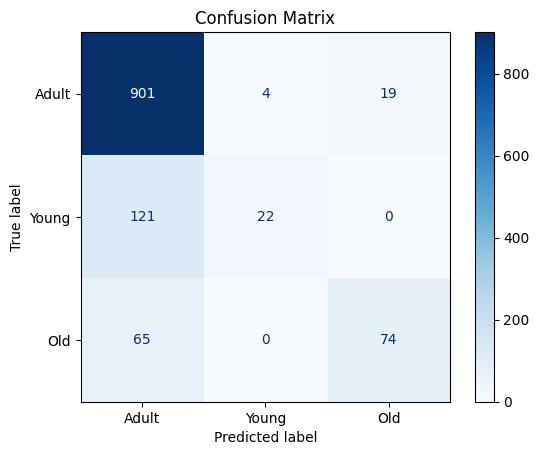

In [ ]:
cm = confusion_matrix(y_test, y_pred1)

# Tentukan nama kelas yang ingin ditampilkan pada confusion matrix
class_names = ['Adult', 'Young', 'Old']

# Plot confusion matrix dengan menampilkan nama kelas
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

berikut penejlasan dari confusion matriks diatas :

Untuk kelas Adult:
- TP (True Positive) = 901, artinya 901 data tergolong dalam kelas Adult dan diprediksi benar oleh model sebagai Adult.
- False Negative) = 4, artinya 5 data tergolong dalam kelas Adult tetapi salah diprediksi sebagai Young.
- FP (False Positive) = 19, artinya 10 data yang sebenarnya bukan tergolong dalam kelas Adult tetapi diprediksi sebagai Adult oleh model.
- TN (True Negative): Tidak diberikan dalam confusion matrix karena tidak relevan untuk kelas yang bersangkutan.

Untuk kelas Young:
- TP = 121, artinya 121 data tergolong dalam kelas Young dan diprediksi benar oleh model sebagai Young.
- FN = 22, artinya 22 data tergolong dalam kelas Young tetapi salah diprediksi sebagai Adult.
- FP = 0, artinya 0 data yang sebenarnya bukan tergolong dalam kelas Young tetapi diprediksi sebagai Young oleh model.

Untuk kelas Old:
- TP = 65, artinya 65 data tergolong dalam kelas Old dan diprediksi benar oleh model sebagai Old.
- FN = 0, artinya 0 data tergolong dalam kelas Old tetapi salah diprediksi sebagai Young.
- FP = 74, artinya 74 data yang sebenarnya bukan tergolong dalam kelas Old tetapi diprediksi sebagai Old oleh model.

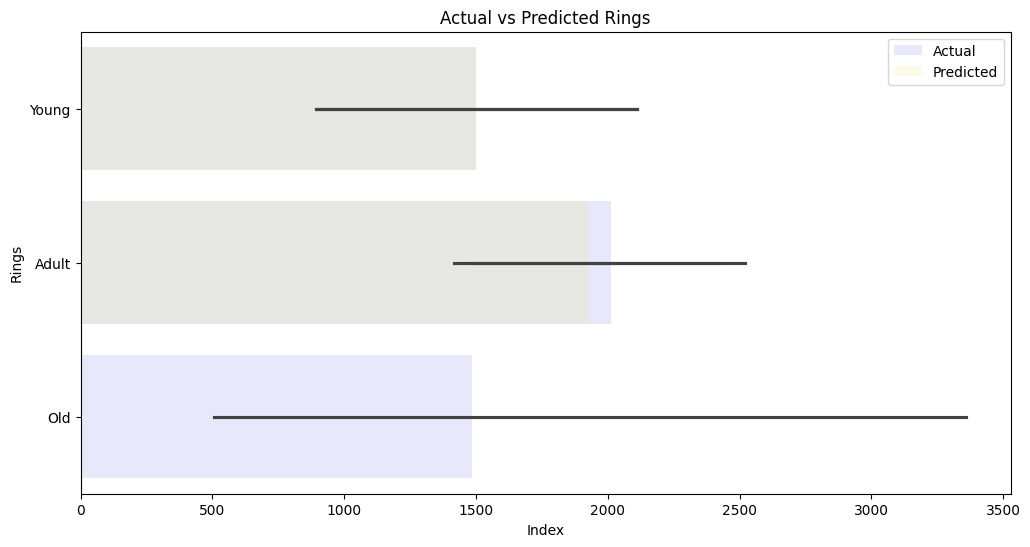

In [ ]:
# Visualisasi Hasil Klasifikasi yang Dilakukan:
result = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred1})
result = result.head(20)  # Ambil 20 data pertama untuk visualisasi

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=result.index, y='Actual', data=result, color='blue',alpha=0.1, label='Actual')
sns.barplot(x=result.index, y='Predicted', data=result, color='yellow',alpha=0.1, label='Predicted')
plt.xlabel('Index')
plt.ylabel('Rings')
plt.title('Actual vs Predicted Rings')
plt.legend()
plt.show()

Dapat dilihat dari barchart perbandingan antara hasil klasifikasi dan data asli terdapat pada kelas Young berhasil teklasifikasi dengan baik, pada kelas Adult terdapat data asli yang tidak terklasifikasi, dan kelas Old hasil klasifikasinya belum baik.

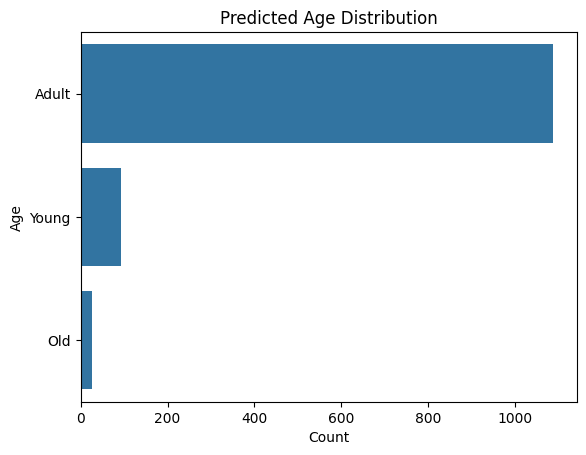

In [ ]:
# Plot Persebaran data pada tiap kelasnya dari hasil klasifikasi yang dibuat
sns.countplot(y_pred1)
plt.title('Predicted Age Distribution')
plt.xlabel('Count')
plt.ylabel('Age')
plt.show()

Dari pesebaran data pada tiap kelas dapat dilihat bahwa kelas Adult lebih mendominasi daripada kelas Young dan Old.

In [ ]:
#Library
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint


Berikut Fitur Yang Memiliki Peranan Penting dalam Klasifikasi yang dilakukan untuk mengklasifikasikan umur abalone berdasaran pengkuran fisiknya :

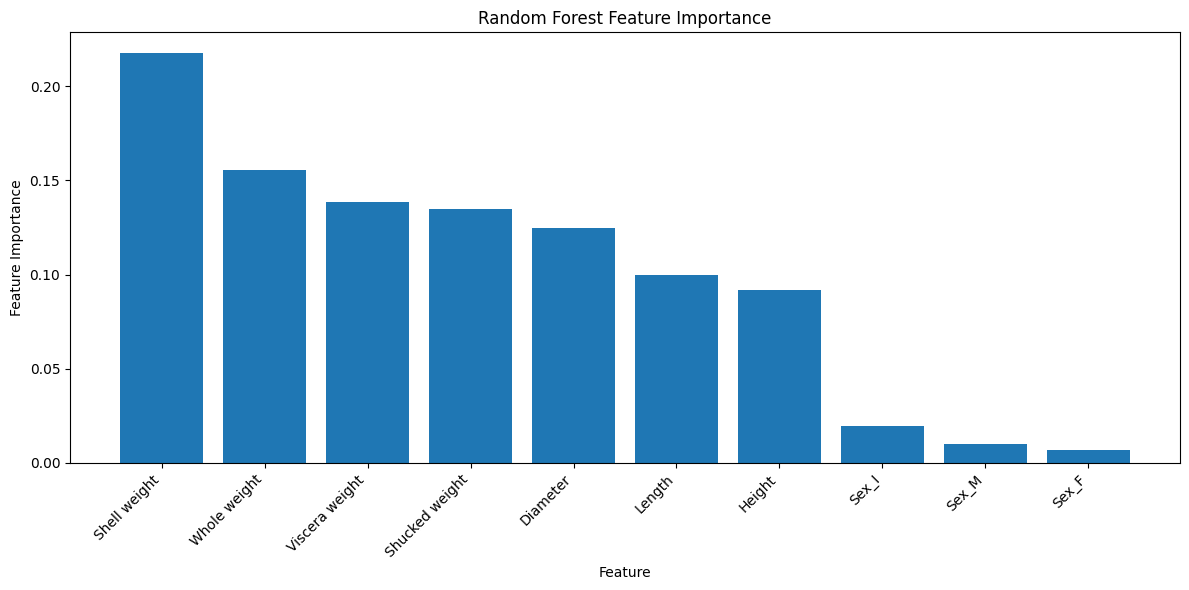

In [ ]:
# Membuat DataFrame untuk menyimpan nama fitur
feature_names = X.columns
feature_importances = pd.Series(rf1.feature_importances_, index=feature_names).sort_values(ascending=False)

# Plot bar chart
plt.figure(figsize=(12, 6))
plt.bar(feature_importances.index, feature_importances)
plt.xlabel('Feature')
plt.ylabel('Feature Importance')
plt.title('Random Forest Feature Importance')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Dapat dilihat bahwa fitur yang memiliki peranan penting dalam pengklasifikan umur abalone menggunakan pengukuran fisik adalah fitur Shell Weight, fitur weight atau berat menjadi fitur penting diikutin fitur lainya.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


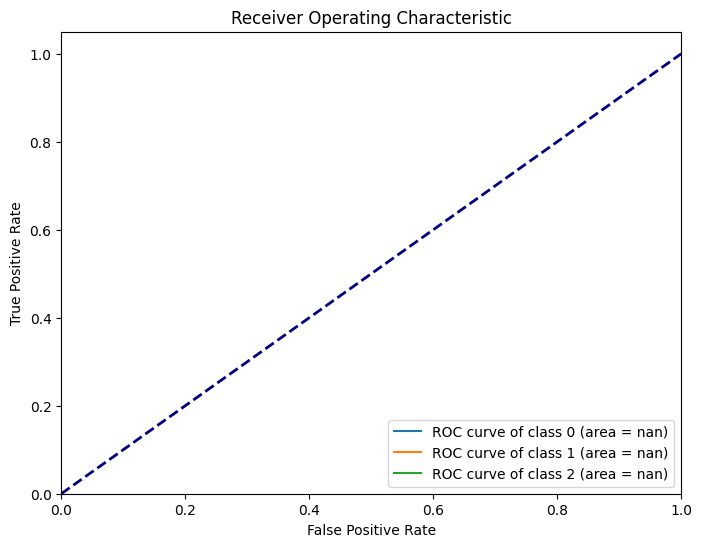

In [ ]:
#MEMBUAT KURVA ROC
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

rf1.fit(X_train, y_train)

# Mengubah label kelas menjadi format biner
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])  # Ganti dengan jumlah kelas Anda

# Menghitung probabilitas prediksi kelas untuk setiap kelas
y_score = rf1.predict_proba(X_test)

# Menghitung nilai TPR dan FPR untuk setiap kelas
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):  # Ganti dengan jumlah kelas Anda
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot kurva ROC untuk setiap kelas
plt.figure(figsize=(8, 6))
for i in range(3):  # Ganti dengan jumlah kelas Anda
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


Dapat dilihat pada kurva ROC diatas semakin tinggi true positive makin meningkat pula false negativenya. Menandakan bahwa model memiliki tingkat kesalahan yang meningkat dalam mengklasifikasikan contoh negatif sebagai positif (FPR meningkat), sementara juga memiliki tingkat keberhasilan yang meningkat dalam mengklasifikasikan contoh positif dengan benar (TPR meningkat).

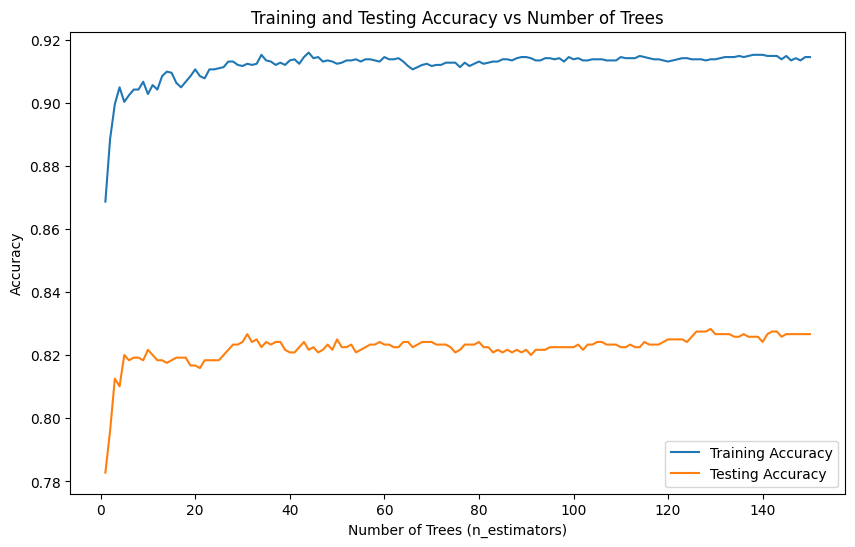

In [ ]:
#KURVA AKURASI MODEL YANG DIBUAT
import numpy as np
import matplotlib.pyplot as plt

# n_estimators dari 1 hingga 150
n_estimators_values = range(1, 151)
train_scores = []
test_scores = []

for n_estimators in n_estimators_values:
    rf1 = RandomForestClassifier(n_estimators=n_estimators, max_depth=10, random_state=100)
    rf1.fit(X_train, y_train)
    train_score = rf1.score(X_train, y_train)
    test_score = rf1.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)

# Plot grafik akurasi
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_values, train_scores, label='Training Accuracy')
plt.plot(n_estimators_values, test_scores, label='Testing Accuracy')
plt.xlabel('Number of Trees (n_estimators)')
plt.ylabel('Accuracy')
plt.title('Training and Testing Accuracy vs Number of Trees')
plt.legend()
plt.show()



Dapat dilihat plot diatas menunjukkan semaki meningkatnya n_estimator maka semakin meningkat pula nilai akurasi baik pada data training maupun testing, grafik akurasi menunjukkan peningkatan yang stabil seiring berjalannya waktu, ini menunjukkan bahwa model terus belajar dan meningkatkan kemampuannya untuk mengklasifikasikan gambar-gambar dengan benar.

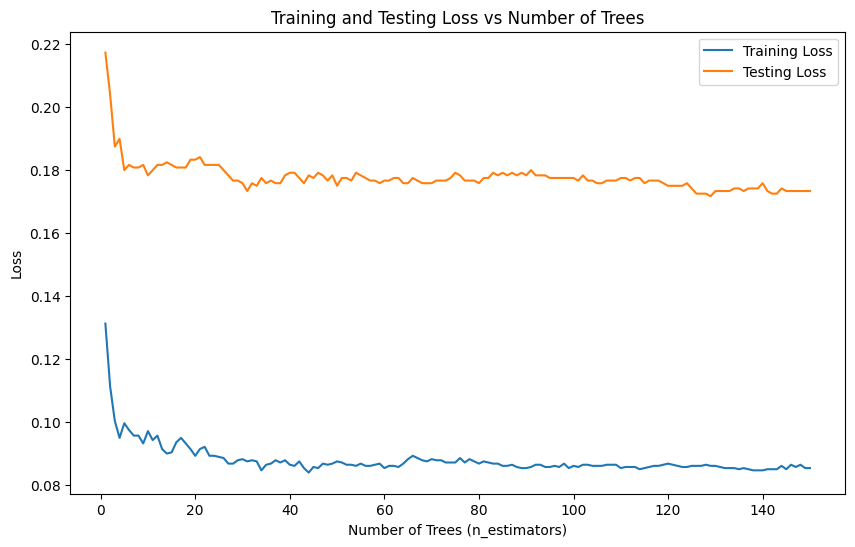

In [ ]:
#KURVA VAR LOSS PADA MODEL YANG DIBUAT:
#n_estimators dari 1 hingga 150
n_estimators_values = range(1, 151)
train_loss = []
test_loss = []

for n_estimators in n_estimators_values:
    rf1 = RandomForestClassifier(n_estimators=n_estimators, max_depth=10, random_state=100)
    rf1.fit(X_train, y_train)
    train_loss.append(1 - rf1.score(X_train, y_train))  # Hitung loss pada data latih
    test_loss.append(1 - rf1.score(X_test, y_test))     # Hitung loss pada data uji

# Plot grafik loss
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_values, train_loss, label='Training Loss')
plt.plot(n_estimators_values, test_loss, label='Testing Loss')
plt.xlabel('Number of Trees (n_estimators)')
plt.ylabel('Loss')
plt.title('Training and Testing Loss vs Number of Trees')
plt.legend()
plt.show()


Dapat dilihat grafik loss menunjukkan bahwa tiap naiknya n_estimator maka akan semakin menurun pula Loss nya,  grafik loss menunjukkan penurunan yang stabil seiring berjalannya waktu, ini menunjukkan bahwa model secara bertahap mengurangi kesalahannya dan semakin mendekati kemampuan optimalnya.